In [3]:
from src.electrochem.DataPolCurve import PolCurveData, PC1, PC2
from src.plot.DataProcessing import Plot
from src.electrochem.DataEIS import EISData
from src.electrochem.GenerateData import GenerateData
from src.electrochem.GenerateMeasurementPoints import GasFlowCalc, HumidityCalc, \
    MeasurementPoints
from pandas.errors import DtypeWarning
import chardet

import warnings
warnings.filterwarnings("error", category=DtypeWarning)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [3]:
with open("C:/Users/kamal/Thesis-ZBT/datas/12_60 3rd/datas/12_20220611.txt", 'rb') as f:
    result = chardet.detect(f.readline())  # or readline if the file is large

result

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/kamal/Thesis-ZBT/datas/12_60 3rd/datas/12_20220611.txt'

In [18]:
datas = "C:/Users/kamal/Thesis-ZBT/datas/12_60 3rd/datas/12_20220611.txt"
wdir = "C:/Users/kamal/Thesis-ZBT/datas/12_60 3rd/datas"
try:
    d = pd.read_csv(datas, encoding='ISO-8859-1', sep='\t', decimal=',')
except DtypeWarning as e:
    location2 = wdir + '/output.txt'
    with open(datas, "r", encoding='ISO-8859-1') as f, \
            open(location2, 'w', encoding='ISO-8859-1') as fo:
        for enum, line in enumerate(csv.reader(f, delimiter='\t')):
            if enum != 0:
                newl = line
                for num, l in enumerate(newl):
                    newl[num] = l.replace('"', '').replace("'", "")
                for num2, l2 in enumerate(newl[2:]):
                    newl[num2 + 2] = \
                        l2.replace(',', ' ').\
                            replace(' ', '.', 1).\
                            replace(' ', '')
                for num3, nl in enumerate(newl):
                                fo.write(nl + '\t')
            else:
                for num4, nl2 in enumerate(line):
                    fo.write(nl2 + '\t')
            fo.write('\n')
    d = pd.read_csv(location2, encoding='ISO-8859-1', sep='\t')
d

KeyboardInterrupt: 

C:\Users\kamal\AutomateDataPlots\src\DataPolCurve.py:177: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(val_arr, axis=0)


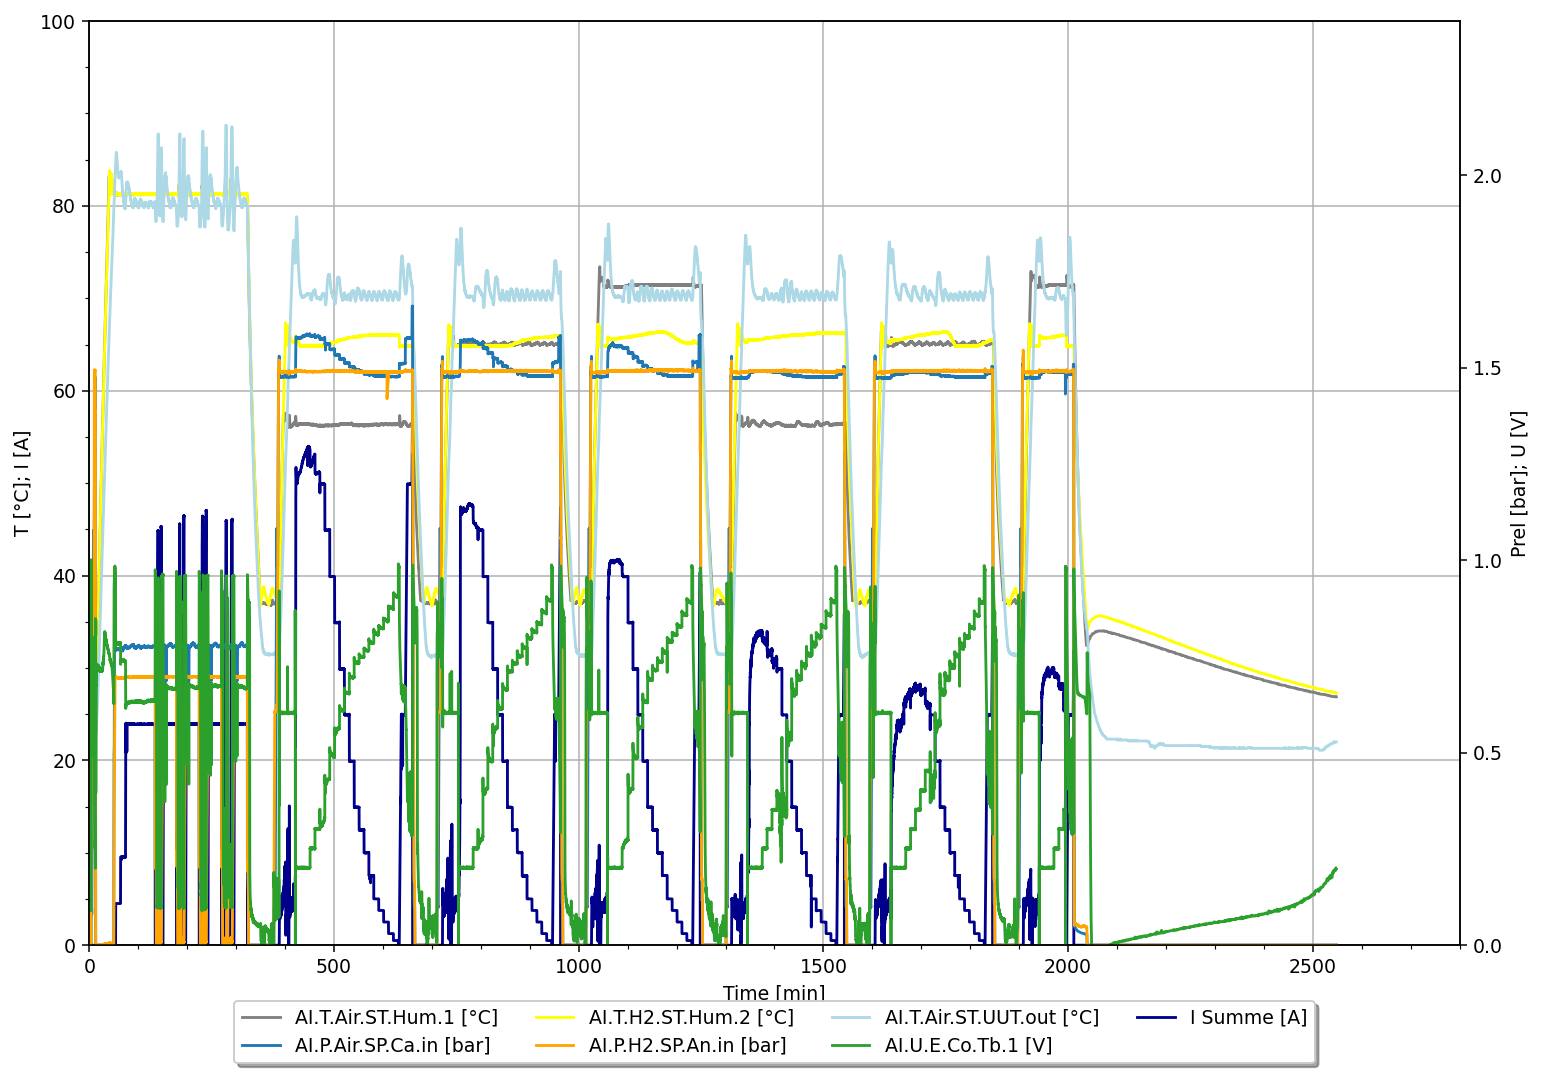

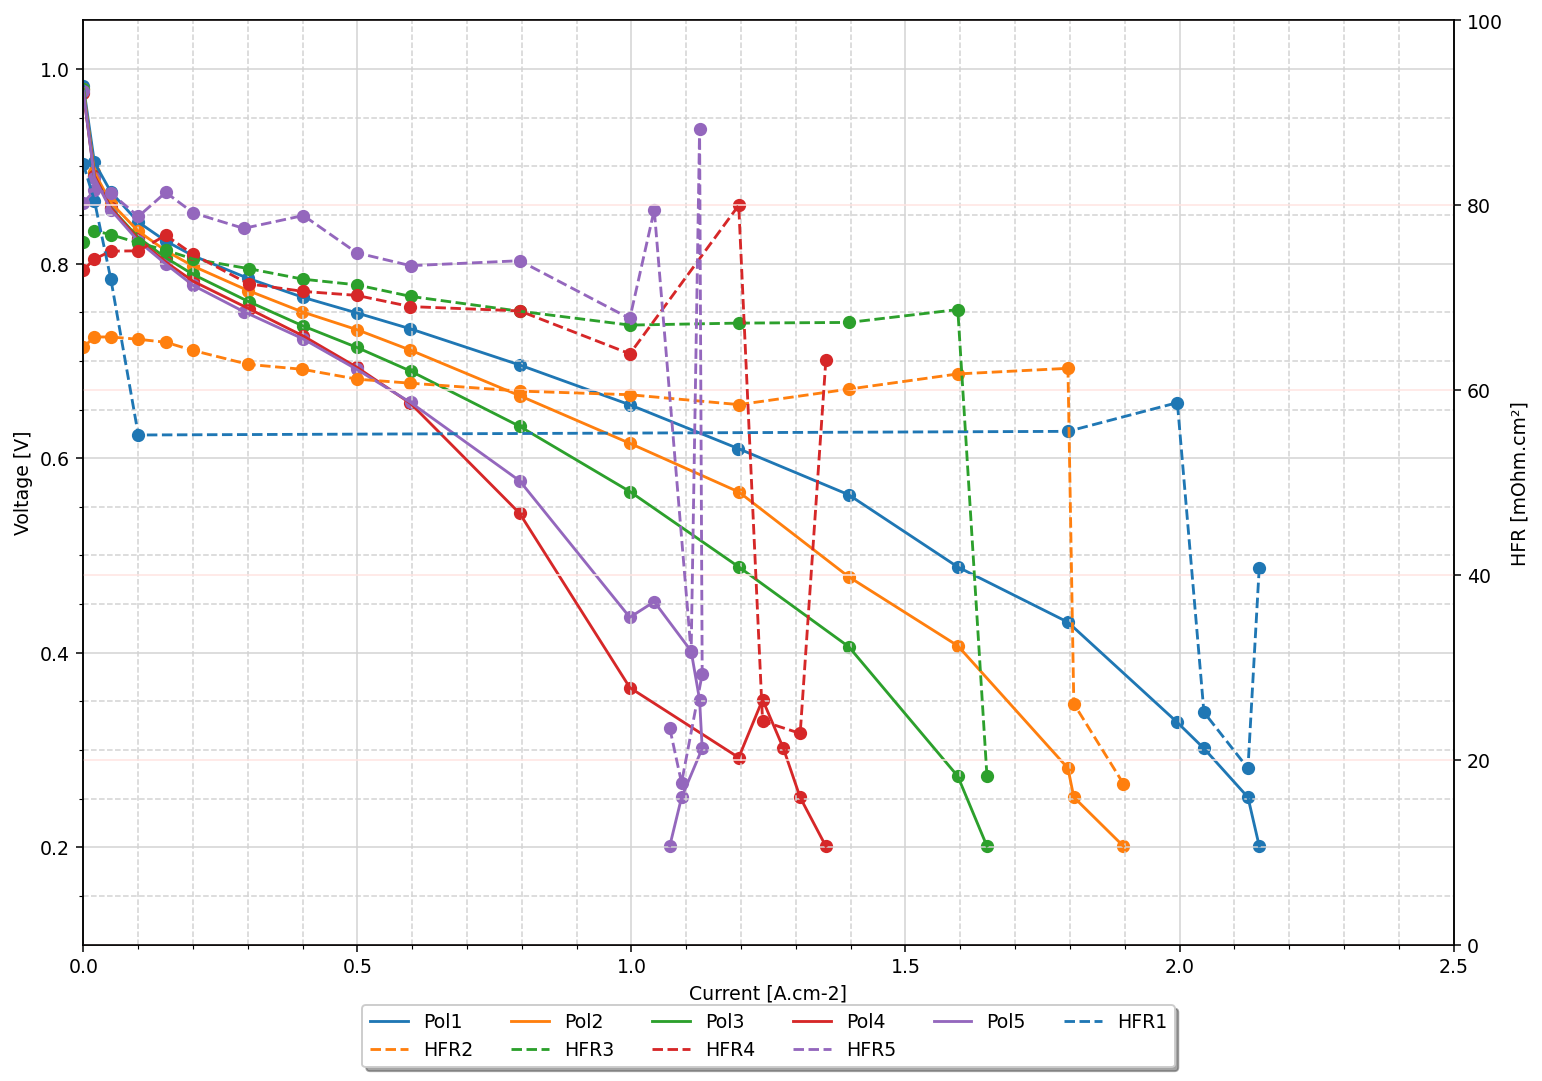

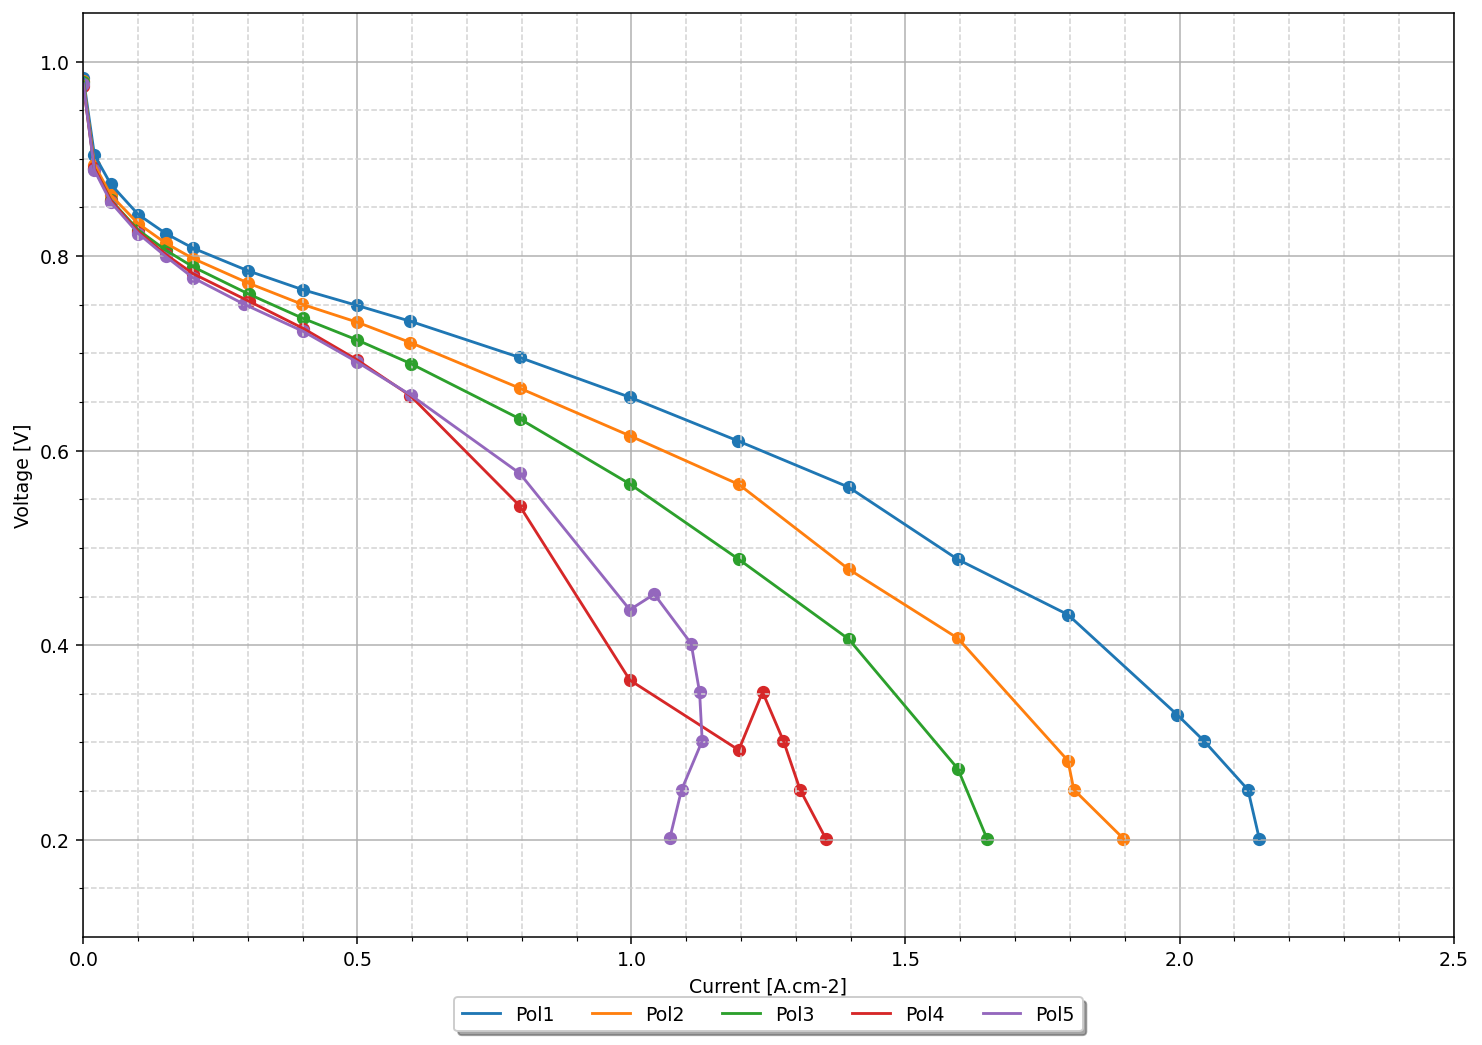

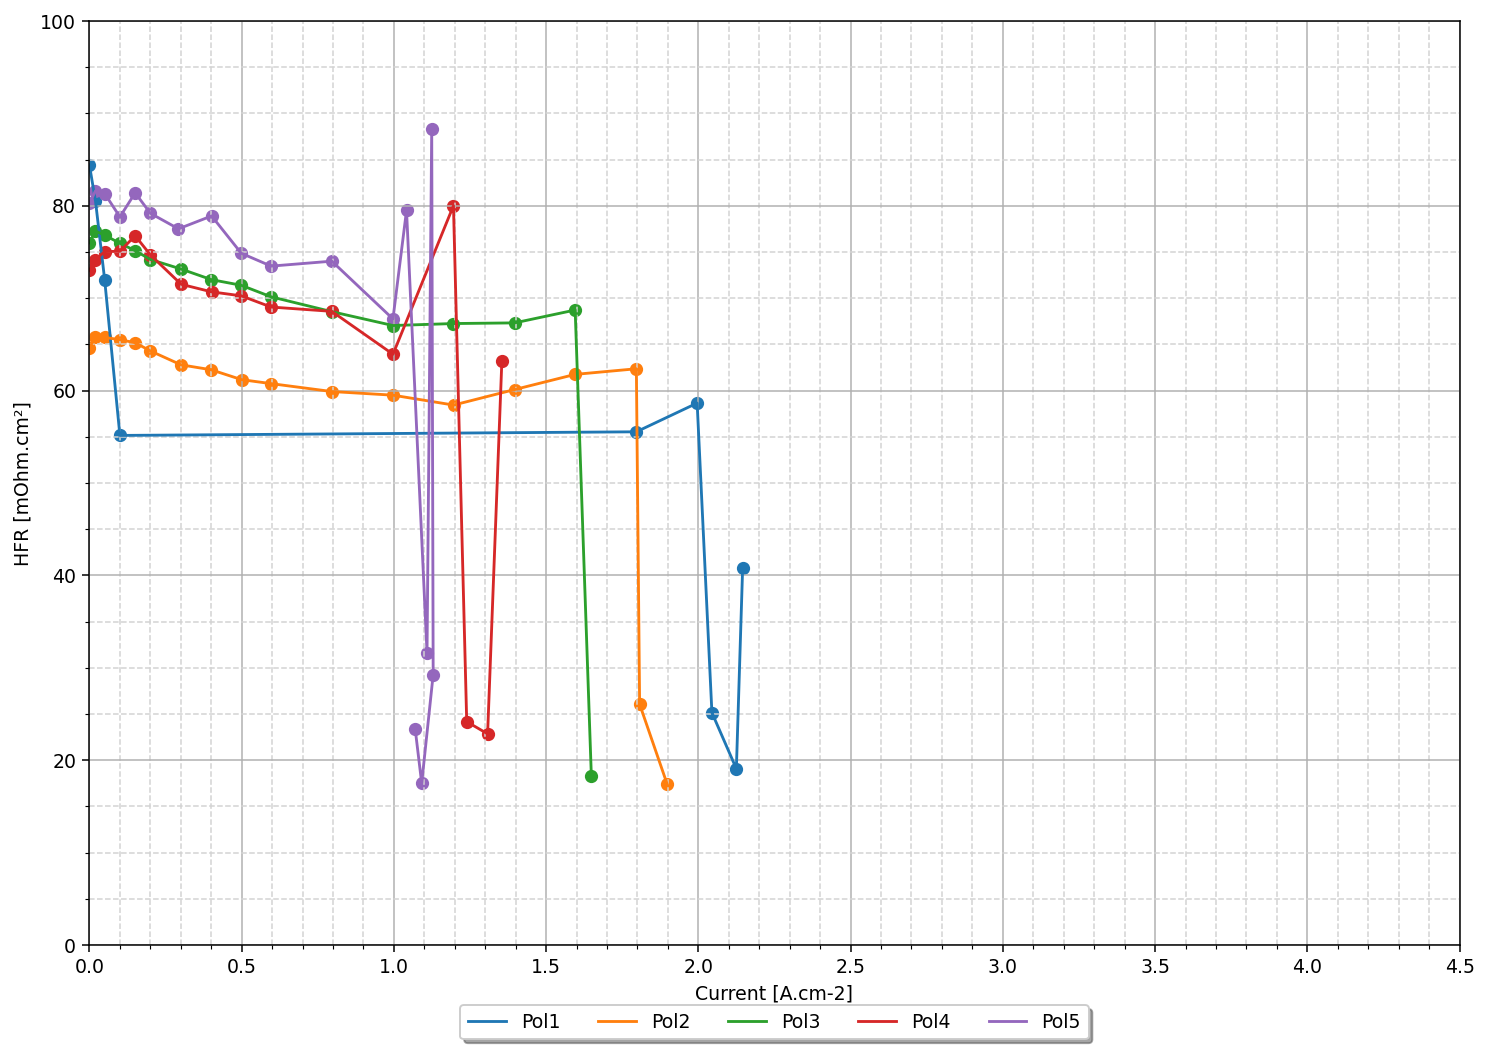

In [6]:
# data_80_old = PolCurveData("C:/Users/kamal/Thesis-ZBT/datas/04_80_1st/datas",
#                        'Case 3 (Old)')
# # data_80_new = PolCurveData("C:/Users/kamal/Thesis-ZBT/datas/09/datas",
# #                        'Case 3 (New)')
# data_80_lat = PolCurveData("C:/Users/kamal/Thesis-ZBT/datas/10_80_3rd/datas",
#                        'Case 3 (Latest)')
# data_60_old = PolCurveData("C:/Users/kamal/Thesis-ZBT/datas/05_60_1st/datas",
#                            'Case 1 (Old)')
# data_60_new = PolCurveData("C:/Users/kamal/Thesis-ZBT/datas/11_60 2nd/datas",
#                            'Case 1 (New)')
data_60_lat = PolCurveData("C:/Users/kamal/Thesis-ZBT/datas/12_60_3rd/datas",
                           'Case 1 (Latest)')
# data_70_old = PolCurveData("C:/Users/kamal/Thesis-ZBT/datas/06_70_2nd/datas",
# #                        'Case 2 (Old)')
# data_70_new = PolCurveData("C:/Users/kamal/Thesis-ZBT/datas/08_70_3rd/datas",
#                        'Case 2 (New)')

In [4]:
data_70_new.dict_chosen_df


{'1':               CD         V       HFR        STD_CD     STD_V
 0   3.667821e+00  0.201105  1.087857  1.957653e-03  0.000041
 1   3.596867e+00  0.267453  2.845714  4.808024e-04  0.001672
 2   3.398115e+00  0.350004  2.675714  2.893329e-04  0.000260
 3   3.197074e+00  0.403306  2.385714  6.352305e-04  0.000313
 4   2.998061e+00  0.451151  2.295714  1.228303e-04  0.000363
 5   2.798003e+00  0.492284       NaN  3.006064e-04  0.000067
 6   2.598572e+00  0.531447       NaN  2.651159e-04  0.000045
 7   2.397433e+00  0.562771  1.921286  2.514128e-04  0.000064
 8   2.197888e+00  0.591993  1.897429  2.853155e-04  0.000063
 9   1.996776e+00  0.624043  1.867000  2.699891e-04  0.000103
 10  1.796909e+00  0.646250  1.828000  2.573480e-04  0.000055
 11  1.595865e+00  0.673138  1.796714  2.474042e-04  0.000024
 12  1.396537e+00  0.695282  1.780143  4.799586e-04  0.000059
 13  1.195415e+00  0.715009  1.767286  4.760488e-04  0.000050
 14  9.972712e-01  0.734527  1.763429  1.550487e-04  0.000027
 15

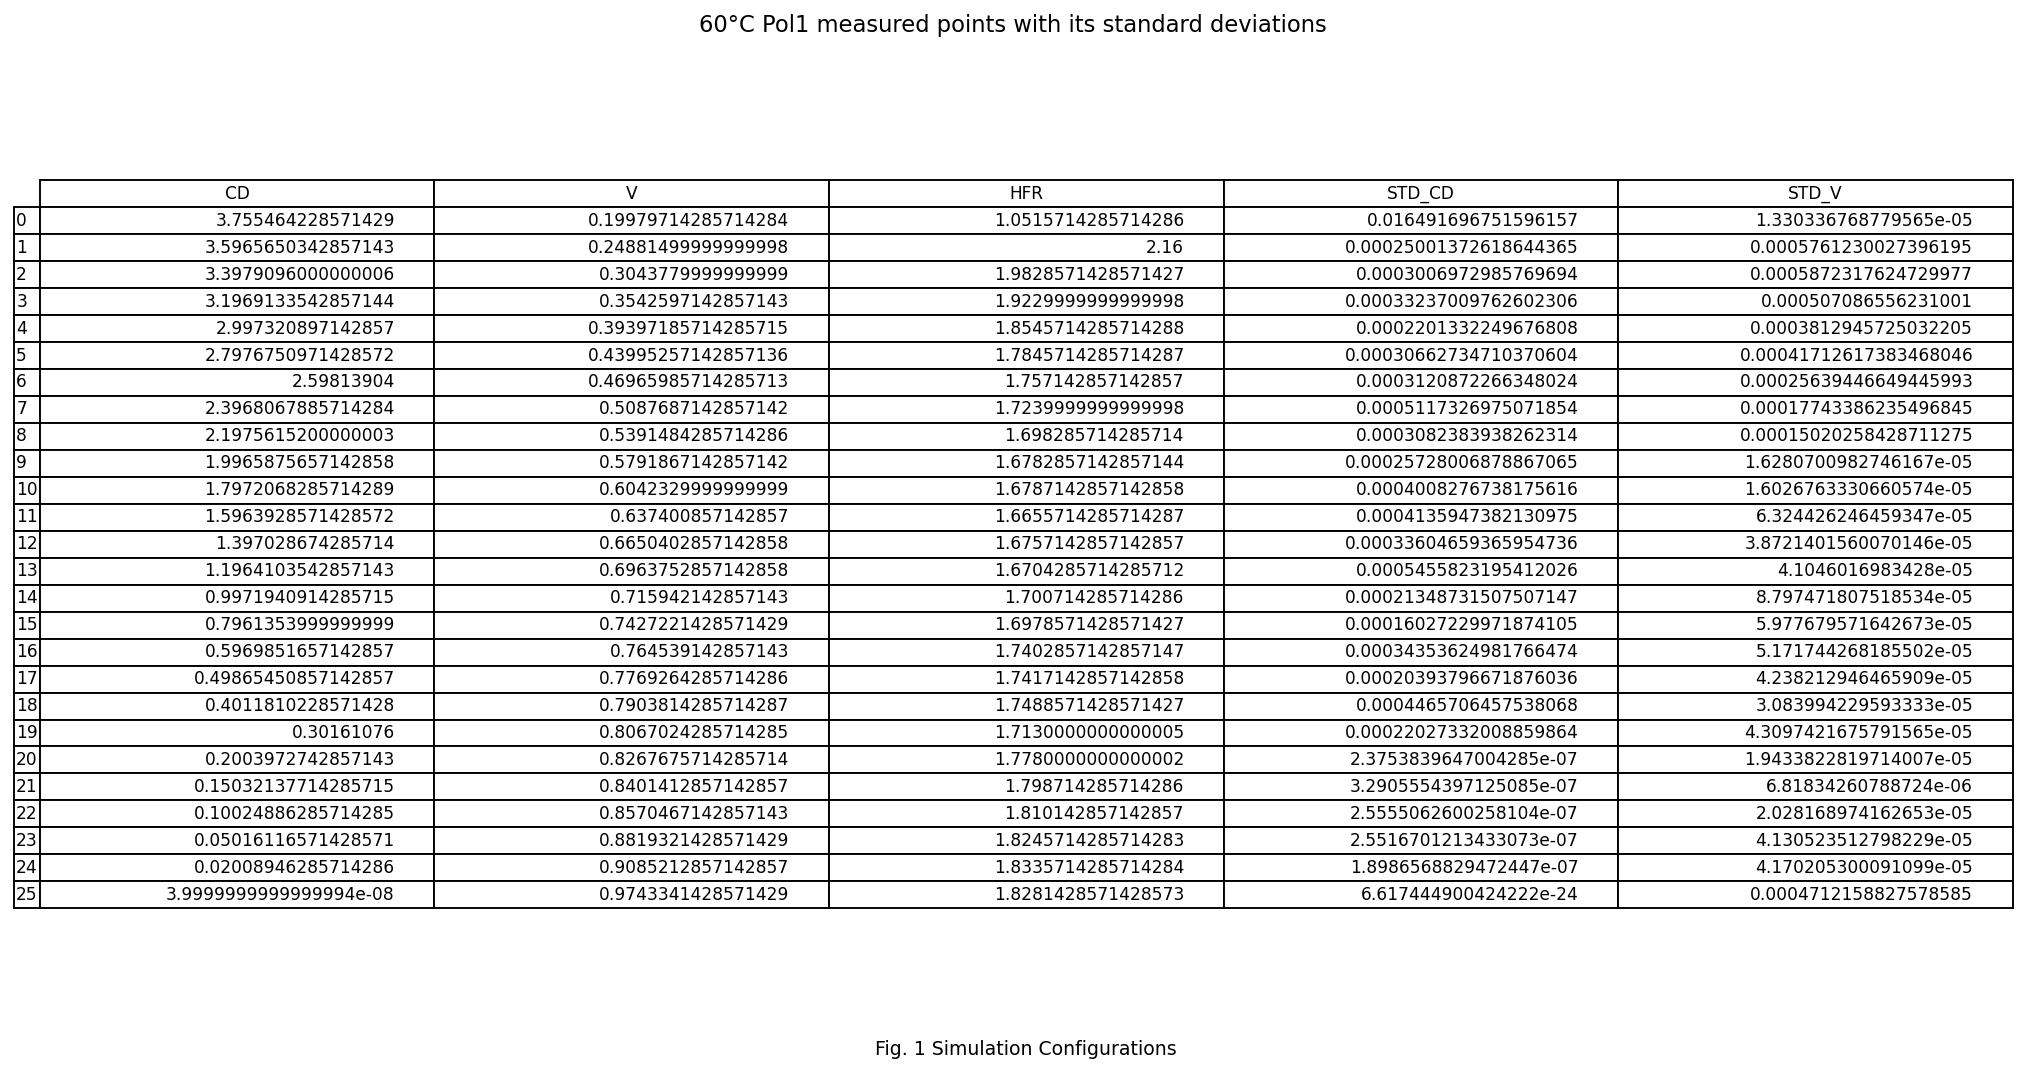

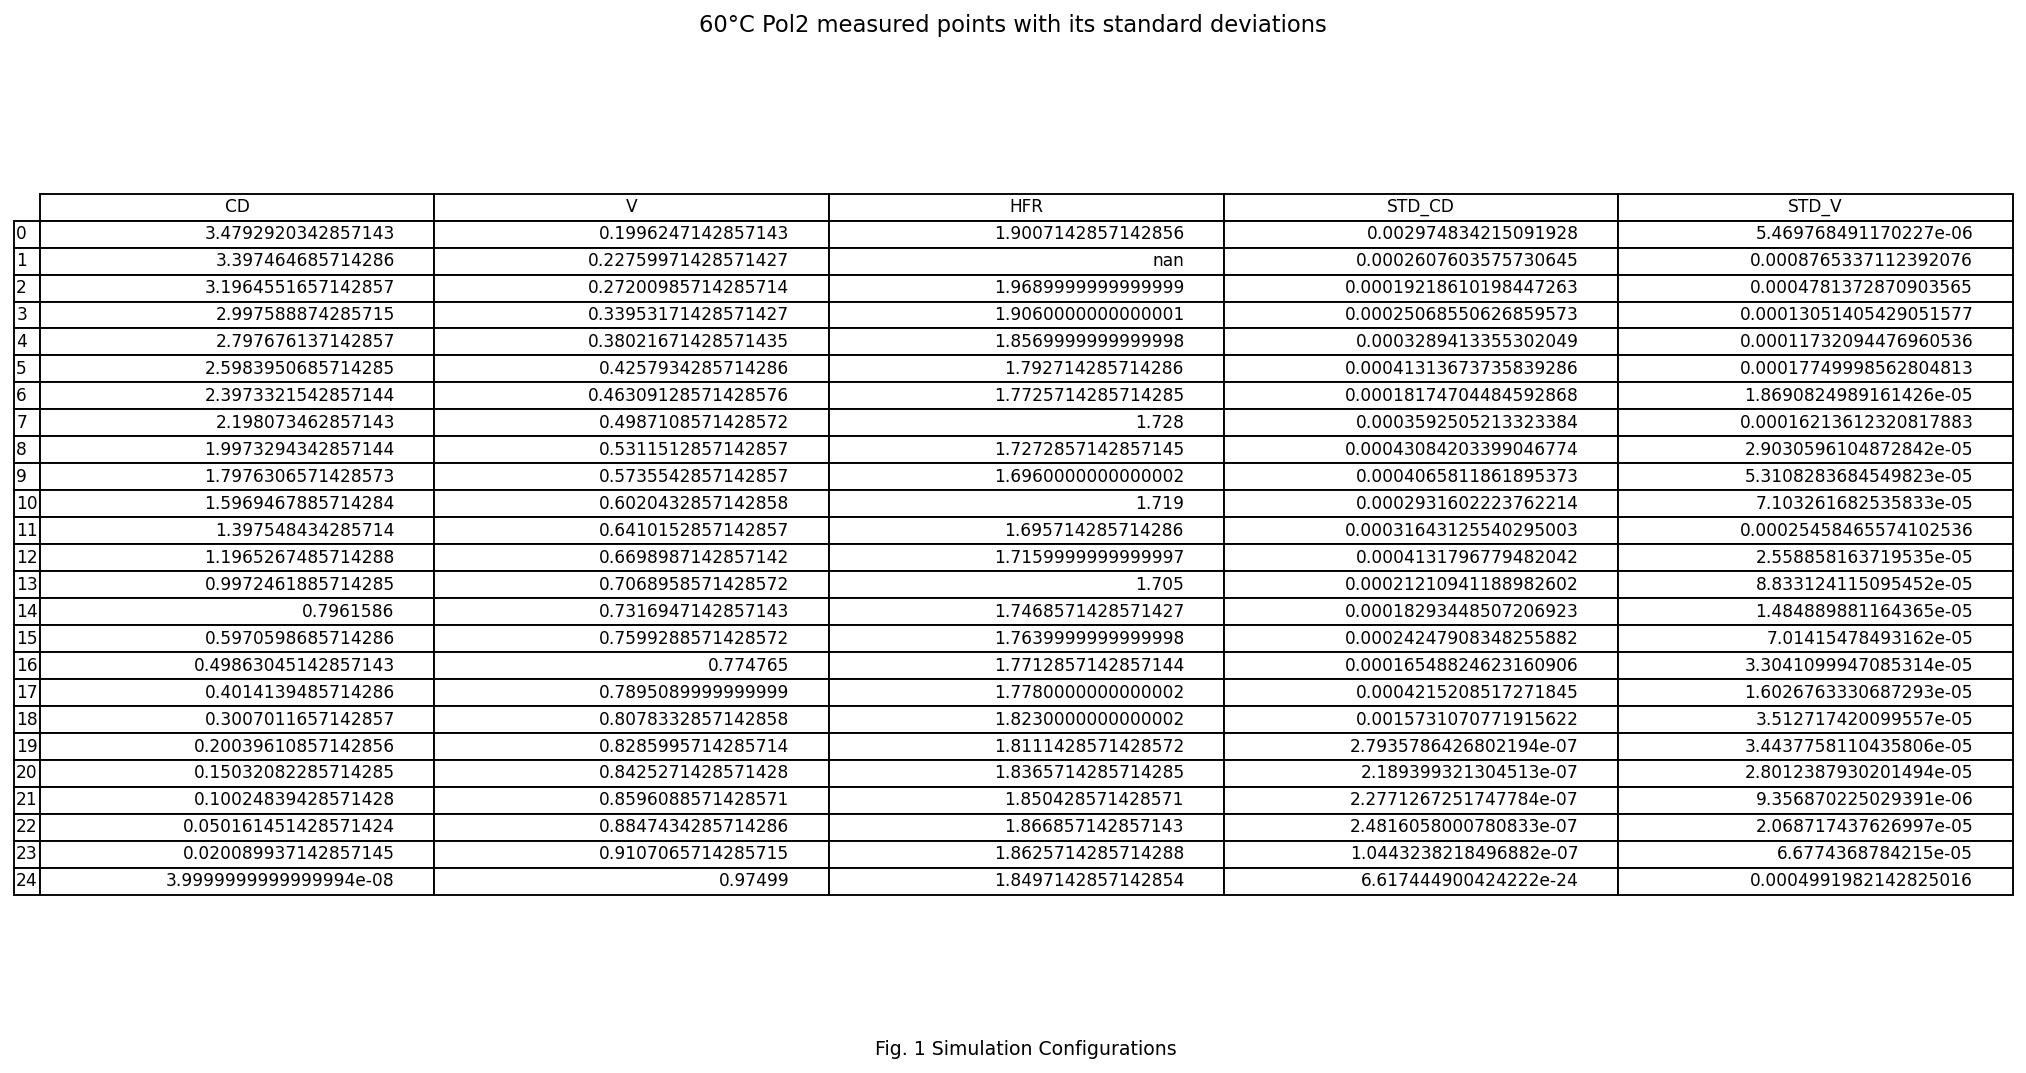

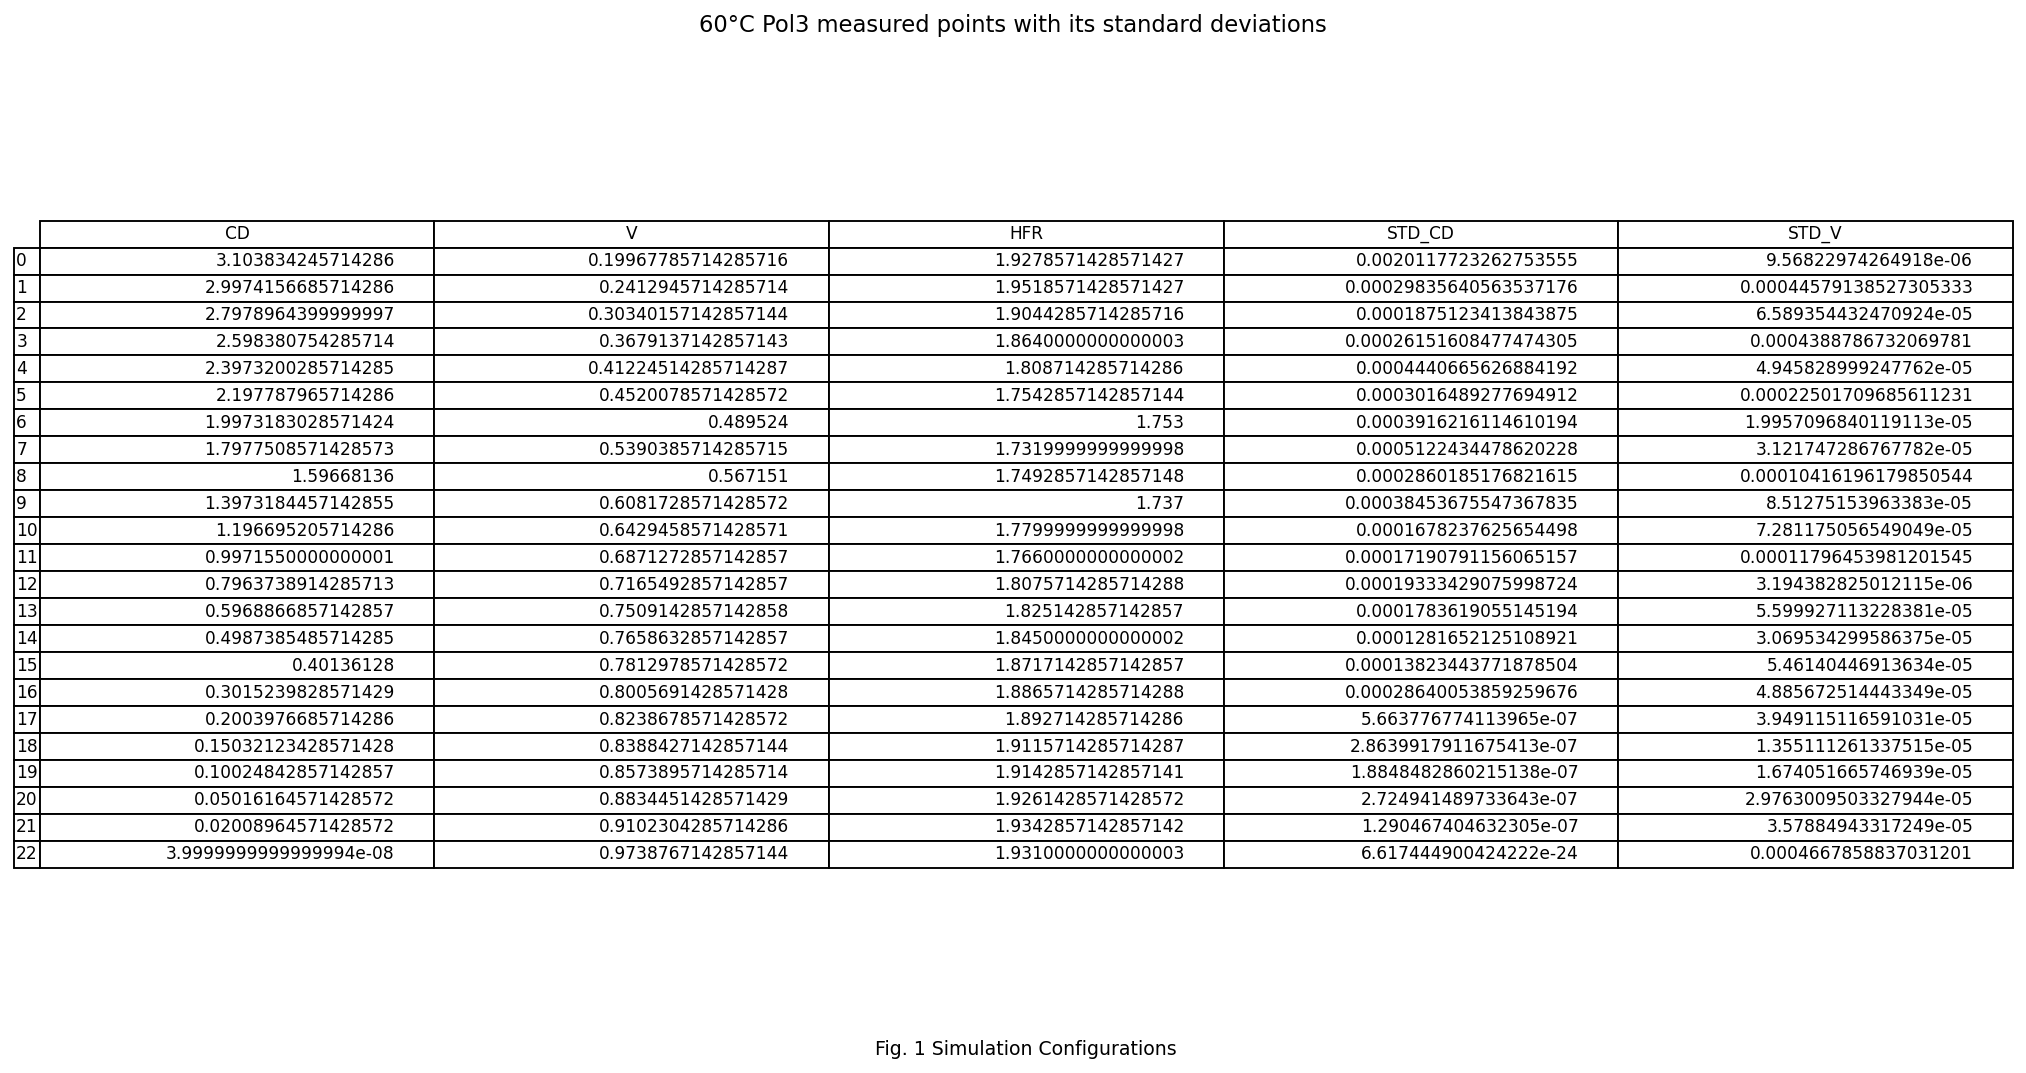

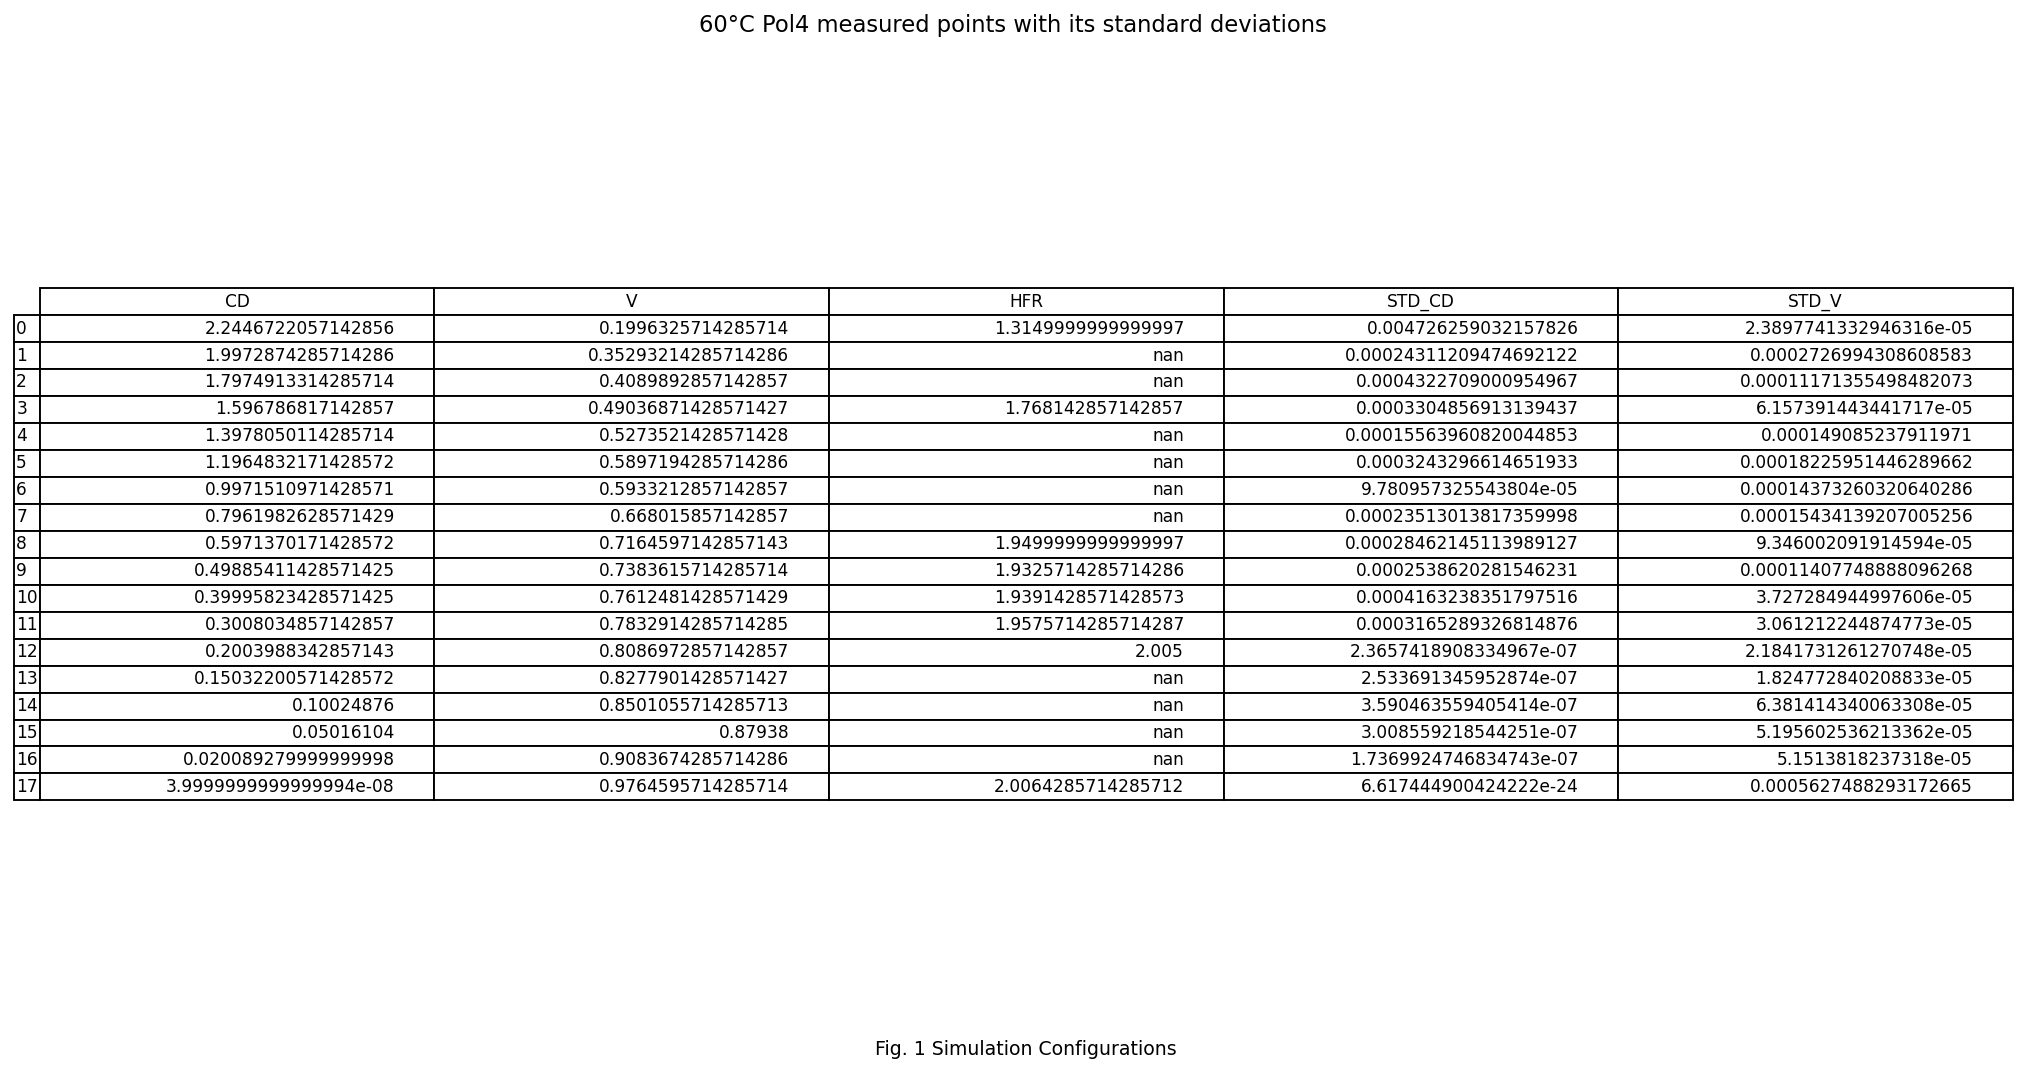

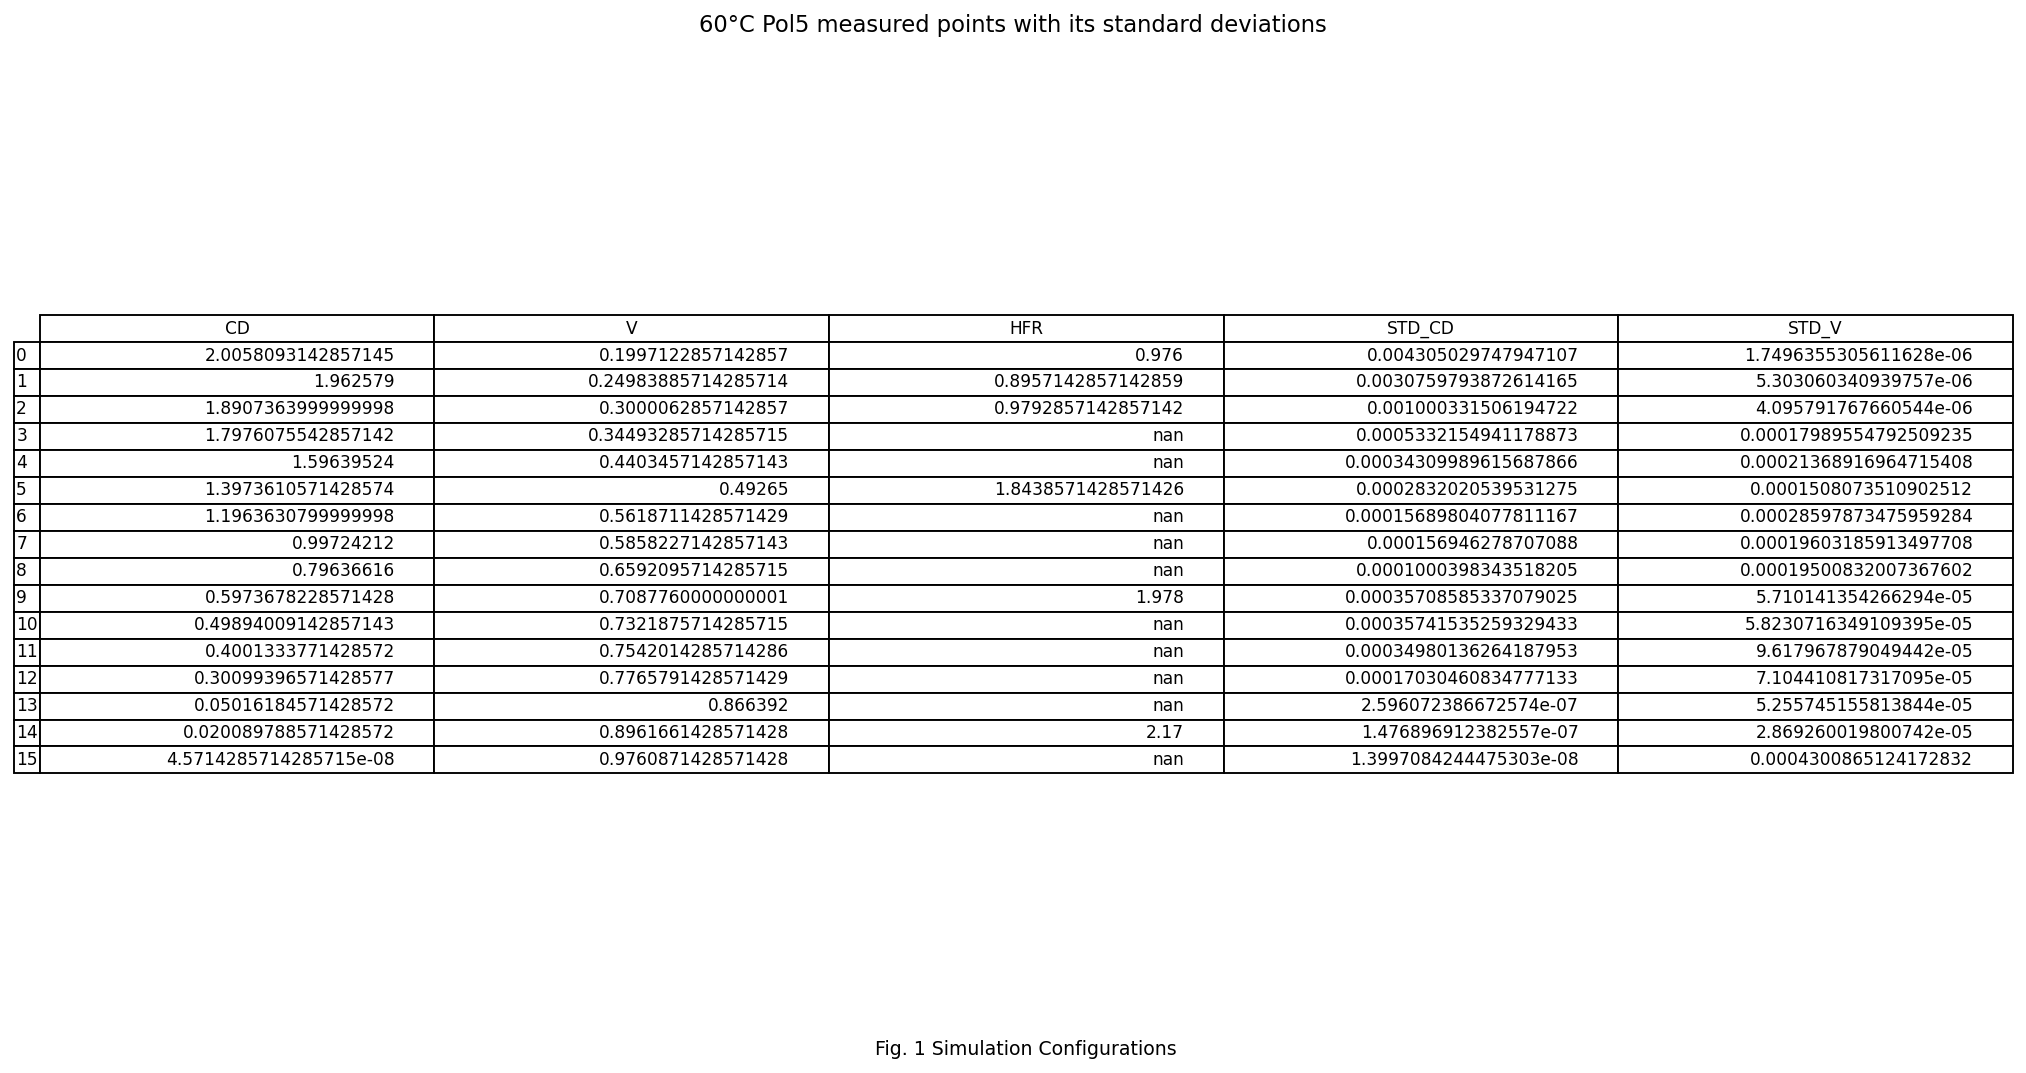

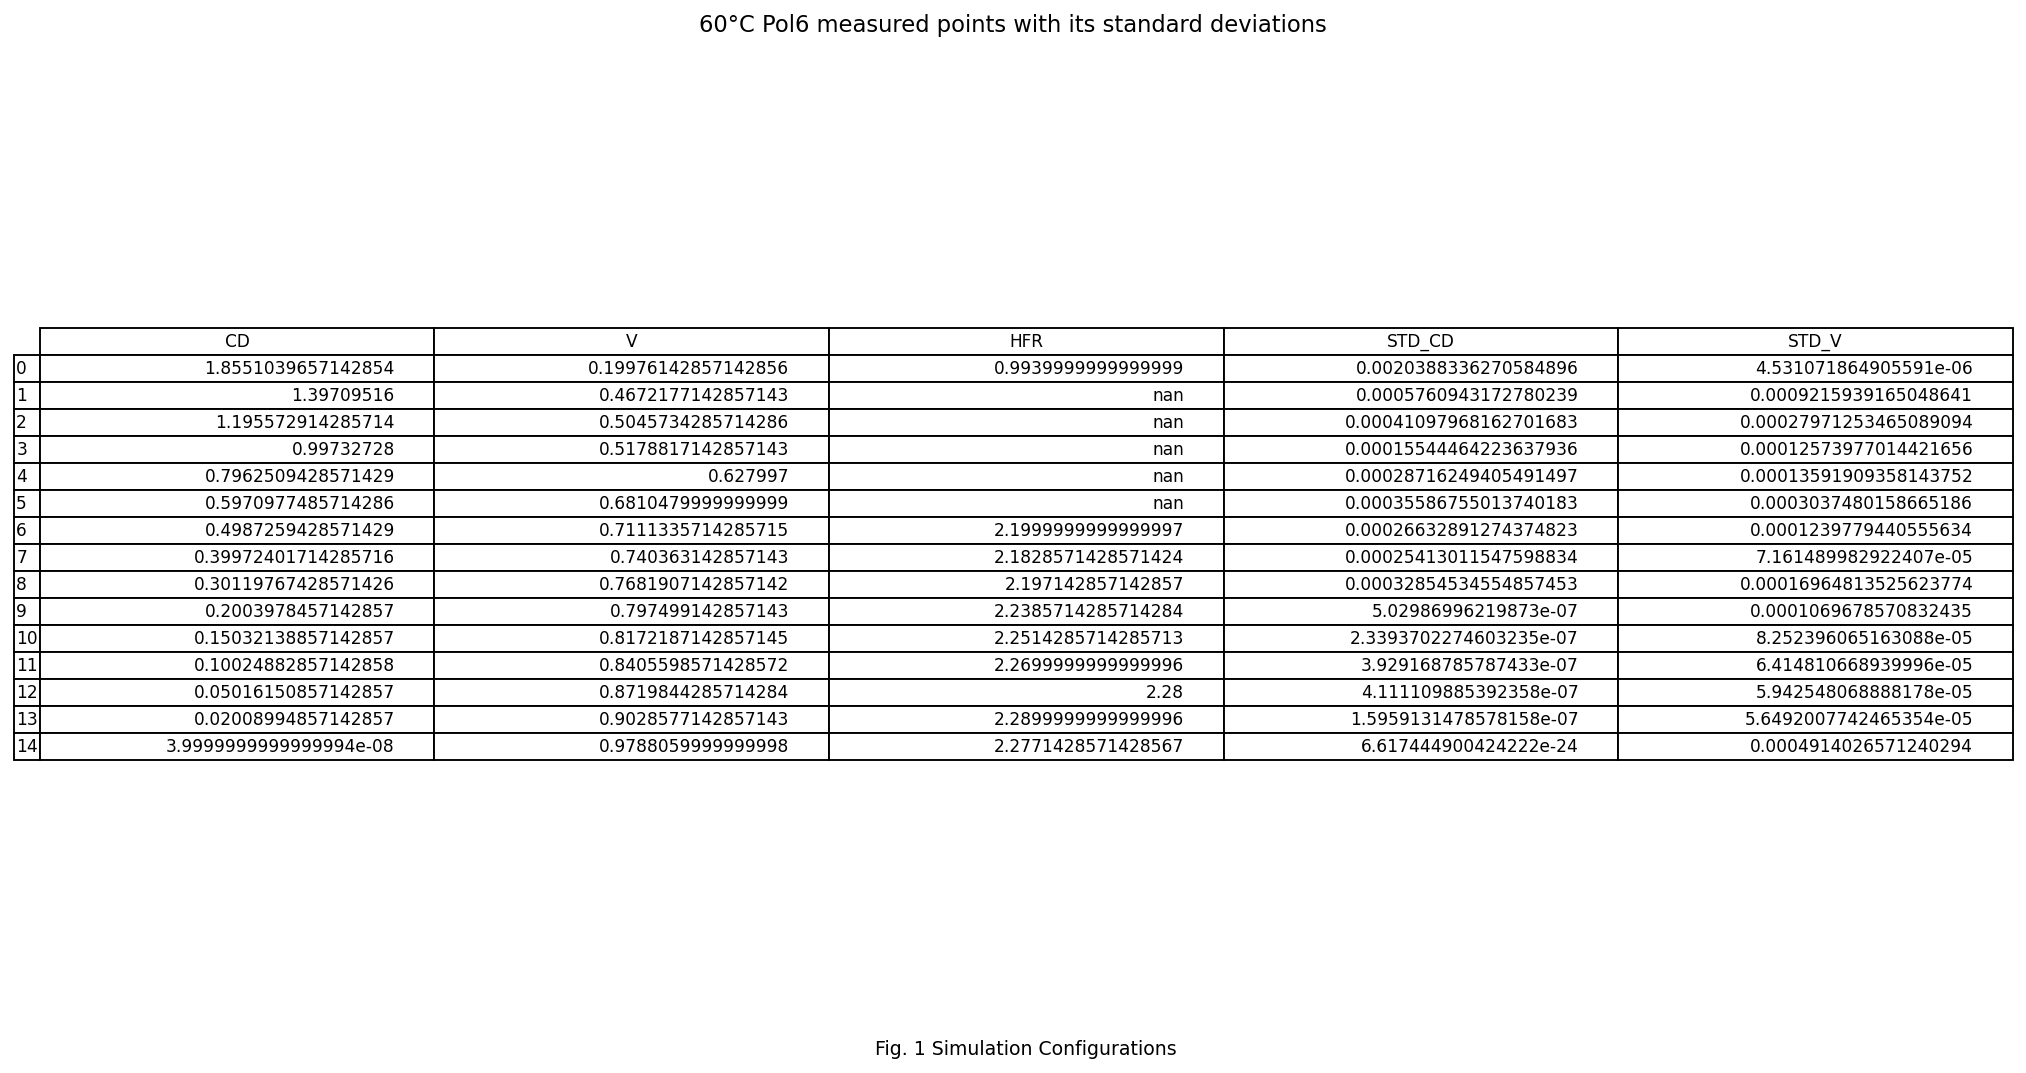

In [6]:
import matplotlib.backends.backend_pdf

onepdf = matplotlib.backends.backend_pdf.PdfPages("generated/pc_60_error.pdf")

for k, df in data_60_old.dict_chosen_df.items():
    fig = plt.figure(figsize=(15, 8), dpi=136)
    ax_t = fig.add_subplot(111)

    table1 = ax_t.table(cellText=df.values,
                        colLabels=df.columns,
                        rowLabels=df.index,
                        loc='center', rasterized=True)

    # ax_t.reset_index(inplace=True)
    table1.auto_set_font_size(False)
    table1.set_fontsize(9)
    ax_t.set_xlabel('Fig. 1 Simulation Configurations')
    ax_t.set_xticks([])
    ax_t.set_yticks([])
    for obj in [ax_t]:
        for key, spine in obj.spines.items():
            spine.set_visible(False)
    # table1.scale(1.85, 1.75)  # may help
    # plt.gca().axes.get_yaxis().set_visible(False)
    # table2.scale(1.2, 1.2)  # may help
    # ax_t2.set_axis_off()
    # ax_t.set_axis_off()
    plt.suptitle(f'60°C Pol{k} measured points with its standard deviations')
    plt.tight_layout()
    onepdf.savefig(fig)
onepdf.close()

In [10]:
# data_60_old.dict_chosen_df['6']
haha = data_60_old.dict_chosen_df['6'].copy()
haha['V'] = haha['V'].round(decimals=2)
haha2 = data_60_old.dict_chosen_df['6'].copy()
haha2['CD'] = haha2['CD'].round(decimals=2)
haha2

CD         V       HFR
0   1.86  0.199761  0.994000
1   1.40  0.467218       NaN
2   1.20  0.504573       NaN
3   1.00  0.517882       NaN
4   0.80  0.627997       NaN
5   0.60  0.681048       NaN
6   0.50  0.711134  2.200000
7   0.40  0.740363  2.182857
8   0.30  0.768191  2.197143
9   0.20  0.797499  2.238571
10  0.15  0.817219  2.251429
11  0.10  0.840560  2.270000
12  0.05  0.871984  2.280000
13  0.02  0.902858  2.290000
14  0.00  0.978806  2.277143

In [11]:
hehe = data_60_new.dict_chosen_df['6'].copy()
hehe['V'] = hehe['V'].round(decimals=2)
hehe2 = data_60_new.dict_chosen_df['6'].copy()
hehe2['CD'] = hehe2['CD'].round(decimals=2)
hehe2

CD         V       HFR
0   2.06  0.201181  1.041143
1   1.80  0.389978       NaN
2   1.60  0.434552       NaN
3   1.40  0.526227       NaN
4   1.20  0.562068  1.826000
5   1.00  0.616980       NaN
6   0.80  0.655546       NaN
7   0.60  0.710266       NaN
8   0.50  0.730971       NaN
9   0.40  0.754586  2.010000
10  0.30  0.777346       NaN
11  0.20  0.801993       NaN
12  0.15  0.823248       NaN
13  0.10  0.844533       NaN
14  0.05  0.875318       NaN
15  0.02  0.906563       NaN
16  0.00  0.991115       NaN

In [12]:
yo = pd.merge(haha.set_index('V'), hehe.set_index('V'), how='outer', on='V')
yo = yo.sort_index()
# yo[['CD_1', 'CD_2']].mean(axis=1, skipna=True)
# yo[['CD_x', 'CD_y']].mean(axis=1, skipna=True)
ye = pd.merge(haha2.set_index('CD'), hehe2.set_index('CD'), how='outer',
              on='CD')
ye = ye.sort_index()
# yo[['CD_x', 'CD_y']].mean(axis=1, skipna=True)
# ye
# ye[['V_x', 'V_y']].mean(axis=1, skipna=True)#
ye2 = pd.merge(haha2.set_index('CD'), hehe2.set_index('CD'), how='inner',
               on='CD')
ye2 = ye2.sort_index()
ye

V_x     HFR_x       V_y     HFR_y
CD                                          
0.00  0.978806  2.277143  0.991115       NaN
0.02  0.902858  2.290000  0.906563       NaN
0.05  0.871984  2.280000  0.875318       NaN
0.10  0.840560  2.270000  0.844533       NaN
0.15  0.817219  2.251429  0.823248       NaN
0.20  0.797499  2.238571  0.801993       NaN
0.30  0.768191  2.197143  0.777346       NaN
0.40  0.740363  2.182857  0.754586  2.010000
0.50  0.711134  2.200000  0.730971       NaN
0.60  0.681048       NaN  0.710266       NaN
0.80  0.627997       NaN  0.655546       NaN
1.00  0.517882       NaN  0.616980       NaN
1.20  0.504573       NaN  0.562068  1.826000
1.40  0.467218       NaN  0.526227       NaN
1.60       NaN       NaN  0.434552       NaN
1.80       NaN       NaN  0.389978       NaN
1.86  0.199761  0.994000       NaN       NaN
2.06       NaN       NaN  0.201181  1.041143

In [299]:
traiyo = ye.copy()

traiyo = traiyo.drop([x for x in traiyo.index if x > 1.96])
# [int(x) for x in list(np.array(traiyo.index)*100)]
# traiyo[['V_x', 'V_y']].mean(axis=1)
traiyo
# [x for x in traiyo.index if x > 1.95]

V_x     HFR_x       V_y  HFR_y
CD                                       
0.00  0.978806  2.277143  0.991115    NaN
0.02  0.902858  2.290000  0.906563    NaN
0.05  0.871984  2.280000  0.875318    NaN
0.10  0.840560  2.270000  0.844533    NaN
0.15  0.817219  2.251429  0.823248    NaN
0.20  0.797499  2.238571  0.801993    NaN
0.30  0.768191  2.197143  0.777346    NaN
0.40  0.740363  2.182857  0.754586  2.010
0.50  0.711134  2.200000  0.730971    NaN
0.60  0.681048       NaN  0.710266    NaN
0.80  0.627997       NaN  0.655546    NaN
1.00  0.517882       NaN  0.616980    NaN
1.20  0.504573       NaN  0.562068  1.826
1.40  0.467218       NaN  0.526227    NaN
1.60       NaN       NaN  0.434552    NaN
1.80       NaN       NaN  0.389978    NaN
1.86  0.199761  0.994000       NaN    NaN

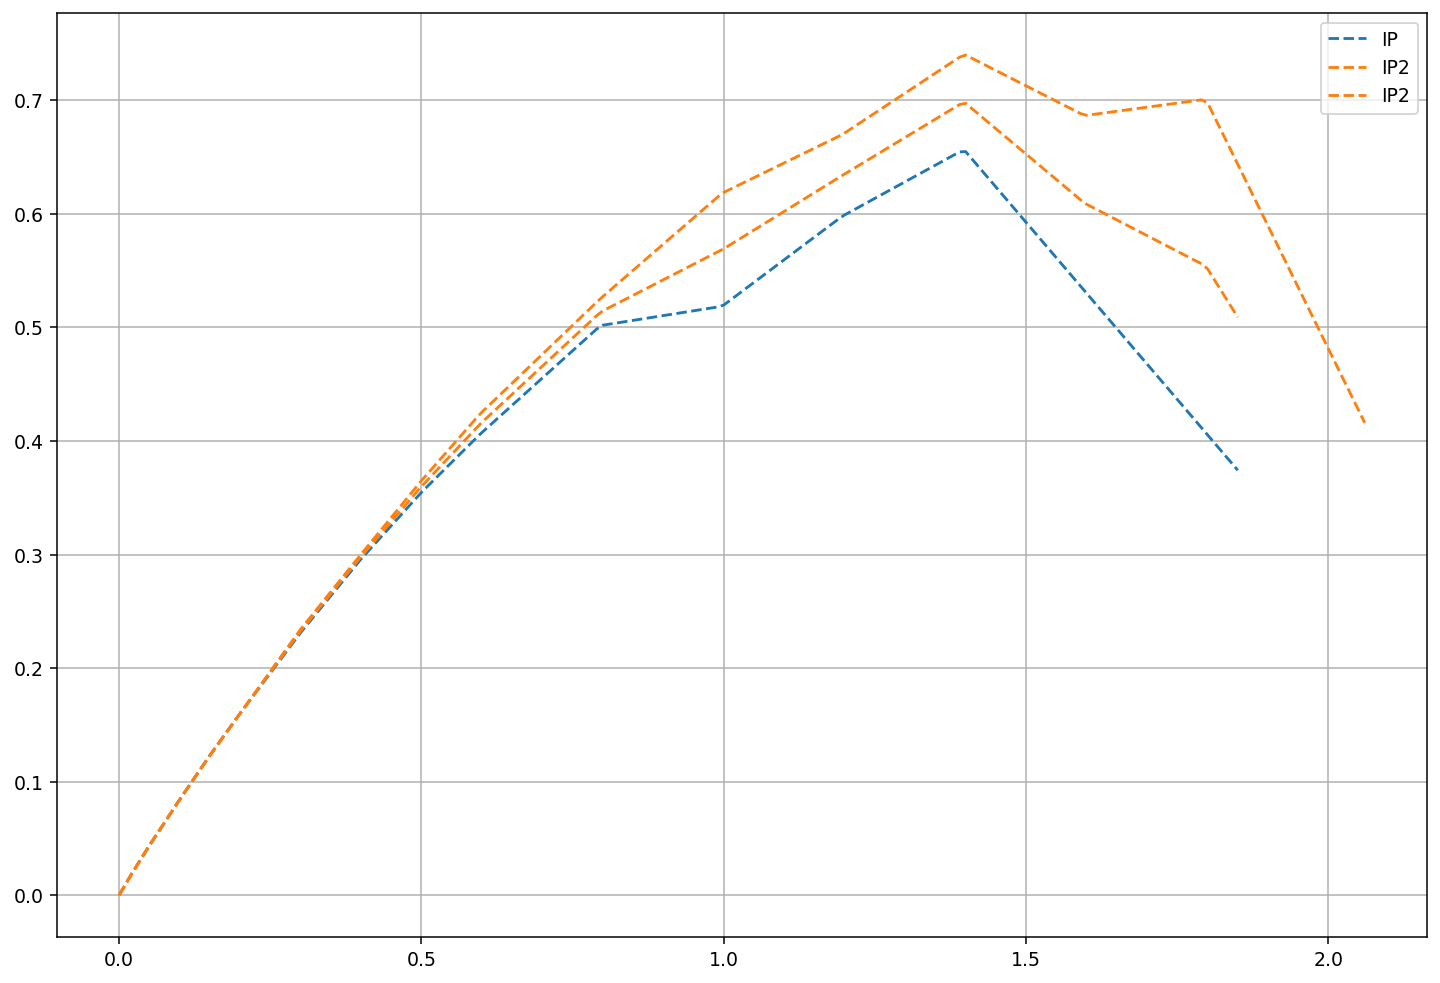

In [20]:
from scipy import interpolate
func = interpolate.interp1d(yo['CD_x'], yo.index*yo['CD_x'], kind= 'slinear',
                            fill_value='extrapolate')
func2 = interpolate.interp1d(yo['CD_y'], yo.index*yo['CD_y'], kind= 'slinear',
                             fill_value='extrapolate')
# func3 = interpolate.interp1d(yo['CD_y'], yo.index, kind= 'linear',
#                              fill_value='extrapolate')
func4 = interpolate.interp1d(ye['V_x'], ye.index, kind= 'linear',
                             fill_value='extrapolate')
func5 = interpolate.interp1d(ye['V_y'], ye.index, kind= 'linear',
                             fill_value='extrapolate')

fig = plt.figure(figsize=(13, 9), dpi=136)
ax1 = fig.add_subplot(111)
xnew = np.arange(0, 4.01, 0.01)
ynew = func(xnew)
ynew2 = func2(xnew)
# ynew3 = func3(xnew)

y2new = np.arange(0.2, 1, 0.01)
x2new4 = func4(y2new)
x2new5 = func5(y2new)

# trai = (ynew+ynew2)/2
# high = int((((x2new4+x2new5)/2)[0]*100).round(decimals=0))-1
# trai[high] = 0.2
# trais = pd.Series(trai)
# ttrais = trais.copy()
# # trais = trais.dropna()
# # trais.index = (trais.index+1)/100
# traiyo = ye.copy()
#
# traiyo = traiyo.drop([x for x in traiyo.index if x > high/100])
# trais = trais.dropna()
# trais2 = ttrais.iloc[[int(x) for x in list(np.array(traiyo.index)*100)]]
# trais2 = trais2.dropna()
#
#
# std_val = pd.Series(np.nanstd(pd.DataFrame(index=xnew, data={'col1':ynew,
#                                                    'col2':ynew2})
#           .to_numpy(), axis=1, ddof=1))
# std_val = std_val.iloc[[int(x) for x in list(np.array(traiyo.index)*100)]]
# std_val.index = (std_val.index+1)/100-0.01
# # trais
# # slice = np.arr([0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, ])
#
# # ax1.plot(yo[['CD_x', 'CD_y']].mean(axis=1, skipna=True), yo.index, '.',
# #          label='AvgData', color='tab:red')
# # ax1.plot(data_60_old.dict_chosen_df['6']['CD'], data_60_old
# #          .dict_chosen_df['6']['V'], marker='.',
# #          label='Data', color='tab:blue')
# # ax1.plot(data_60_new.dict_chosen_df['6']['CD'], data_60_new
# #          .dict_chosen_df['6']['V'], marker='.', label='Data2', color='tab:orange')
# # ax1.plot(xnew, ynew3, '--', label='AvgIP', color='tab:red')
ax1.plot(xnew, ynew, '--', label='IP', color='tab:blue')
ax1.plot(xnew, ynew2, '--', label='IP2', color='tab:orange')
ax1.plot(xnew, (ynew+ynew2)/2, '--', label='IP2', color='tab:orange')
# # ax1.plot(xnew, (ynew+ynew2)/2, '--', label='IP3', color='black')
#
# # ax1.plot(x2new4, y2new, '--', label='IP4', color='tab:blue')
# # ax1.plot(x2new5, y2new, '--', label='IP5', color='tab:orange')
# # ax1.plot((x2new4+x2new5)/2, y2new, '--', label='IP6', color='black')
# # ax1.plot((x2new4+x2new5)/2, y2new, '--', label='IP6', color='black')
# ax1.plot(x2new4, y2new,  '--', label='IP4', color='tab:blue')
# ax1.plot(x2new5, y2new, '--', label='IP5', color='tab:orange')
# ax1.plot(((trais.index+1)/100-0.01).dropna(), trais, label='IP6',
#          color='black', marker='.')
# plt.errorbar(((trais2.index+1)/100-0.01),  trais2.dropna(), yerr=std_val
#              .dropna(),
#                  # yerr=std_dict[f'{enum+1}']['V'],
#                                   linestyle='None', capsize=2,
#                          color='black', elinewidth=0.8)
# # ax1.plot()
#
#
plt.legend()
plt.grid()
plt.show()

In [18]:
(ynew+ynew2)/2

array([1.60000319e-09, 9.05000080e-03, 1.81000000e-02, 2.66540963e-02,
       3.52036698e-02, 4.37532434e-02, 5.18108140e-02, 5.98602885e-02,
       6.79097631e-02, 7.59592376e-02, 8.40087121e-02, 9.18145098e-02,
       9.96140944e-02, 1.07413679e-01, 1.15213264e-01, 1.23012848e-01,
       1.30425311e-01, 1.37824939e-01, 1.45224568e-01, 1.52624197e-01,
       1.60023825e-01, 1.67280768e-01, 1.74531798e-01, 1.81782829e-01,
       1.89033860e-01, 1.96284890e-01, 2.03535921e-01, 2.10786951e-01,
       2.18037982e-01, 2.25289012e-01, 2.32540043e-01, 2.39131037e-01,
       2.45676341e-01, 2.52221645e-01, 2.58766949e-01, 2.65312252e-01,
       2.71857556e-01, 2.78402860e-01, 2.84948164e-01, 2.91493467e-01,
       2.98030572e-01, 3.04225998e-01, 3.10414545e-01, 3.16603092e-01,
       3.22791638e-01, 3.28980185e-01, 3.35168732e-01, 3.41357278e-01,
       3.47545825e-01, 3.53734372e-01, 3.59884080e-01, 3.65557648e-01,
       3.71231176e-01, 3.76904704e-01, 3.82578231e-01, 3.88251759e-01,
      

array([0.25707675, 0.27116972, 0.28526268, 0.29935565, 0.31452743,
       0.3297509 , 0.34497437, 0.36019784, 0.37542131, 0.39064479,
       0.40648711, 0.42331603, 0.44014495, 0.45697387, 0.47380278,
       0.4906317 , 0.87707134, 1.72763104, 1.57301898, 1.23314481,
       0.89327063, 0.60292464, 0.6242537 , 0.64558275, 0.66691181,
       0.68824086, 0.70956992, 0.73089898, 0.75222803, 0.77355709,
       0.79488615, 0.89819612, 1.00483592, 1.0276653 , 1.05049468,
       1.07332406, 1.09615344, 1.11898283, 1.14181221, 1.16464159,
       1.18747097, 1.21856106, 1.2596992 , 1.30083734, 1.34197548,
       1.38311362,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

In [354]:
std_val = pd.Series(np.nanstd(pd.DataFrame(index=xnew, data={'col1':ynew,
                                                   'col2':ynew2})
          .to_numpy(), axis=1, ddof=1))
std_val = std_val.iloc[[int(x) for x in list(np.array(traiyo.index)*100)]]
std_val.index = (std_val.index+1)/100-0.01
std_val

C:\Users\kamal\anaconda3\envs\ZBTanac\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


0.00    7.070955e-03
0.02    7.073470e-03
0.05    7.071516e-03
0.10    3.485076e-05
0.15    2.879385e-07
0.20    5.626403e-07
0.30    6.849554e-03
0.40    7.372455e-03
0.50    1.441716e-02
0.60    2.117807e-02
0.80    2.209545e-02
1.00    7.024412e-02
1.20    4.249901e-02
1.40    4.267578e-02
1.60    5.581150e-02
1.80    1.099556e-01
1.86             NaN
dtype: float64

In [243]:
int((((x2new4+x2new5)/2)[0]*100).round(decimals=0))
# ((x2new4+x2new5)/2)

196

In [313]:
trai = (ynew+ynew2)/2
trai[int((((x2new4+x2new5)/2)[0]*100).round(decimals=0))] = 0.2
trais = pd.Series(trai)
# trais.index = (trais.index+1)/100
# trais = trais.dropna()
# trais[]
# trais.iloc[[int(x) for x in list(np.array(traiyo.index)*100)]]
# [int(x) for x in list(np.array(traiyo.index)*100)]
trais.dropna()

0      0.990000
1      0.950179
2      0.910359
3      0.900114
4      0.890137
         ...   
221    0.270054
222    0.262494
223    0.254934
224    0.248522
232    0.200000
Length: 226, dtype: float64

In [311]:
std_val

0.00    1.499994e-02
0.02    5.047465e-03
0.05    5.000313e-03
0.10    2.482117e-05
0.15    1.223722e-07
0.20    4.960152e-03
0.30    4.921275e-03
0.40    4.987292e-03
0.50    1.132423e-04
0.60    5.006405e-03
0.80    4.889874e-03
1.00    1.378396e-04
1.20    9.979440e-03
1.40    9.995382e-03
1.60    9.924058e-03
1.80    5.034140e-03
2.00    1.003941e-02
2.20    1.491371e-02
2.40    9.978945e-03
2.60    1.002088e-02
2.80    2.474551e-02
3.00    1.899370e-02
3.10    1.982680e-02
dtype: float64

In [86]:
int((((x2new4+x2new5)/2)[0]*100).round(decimals=0))

196

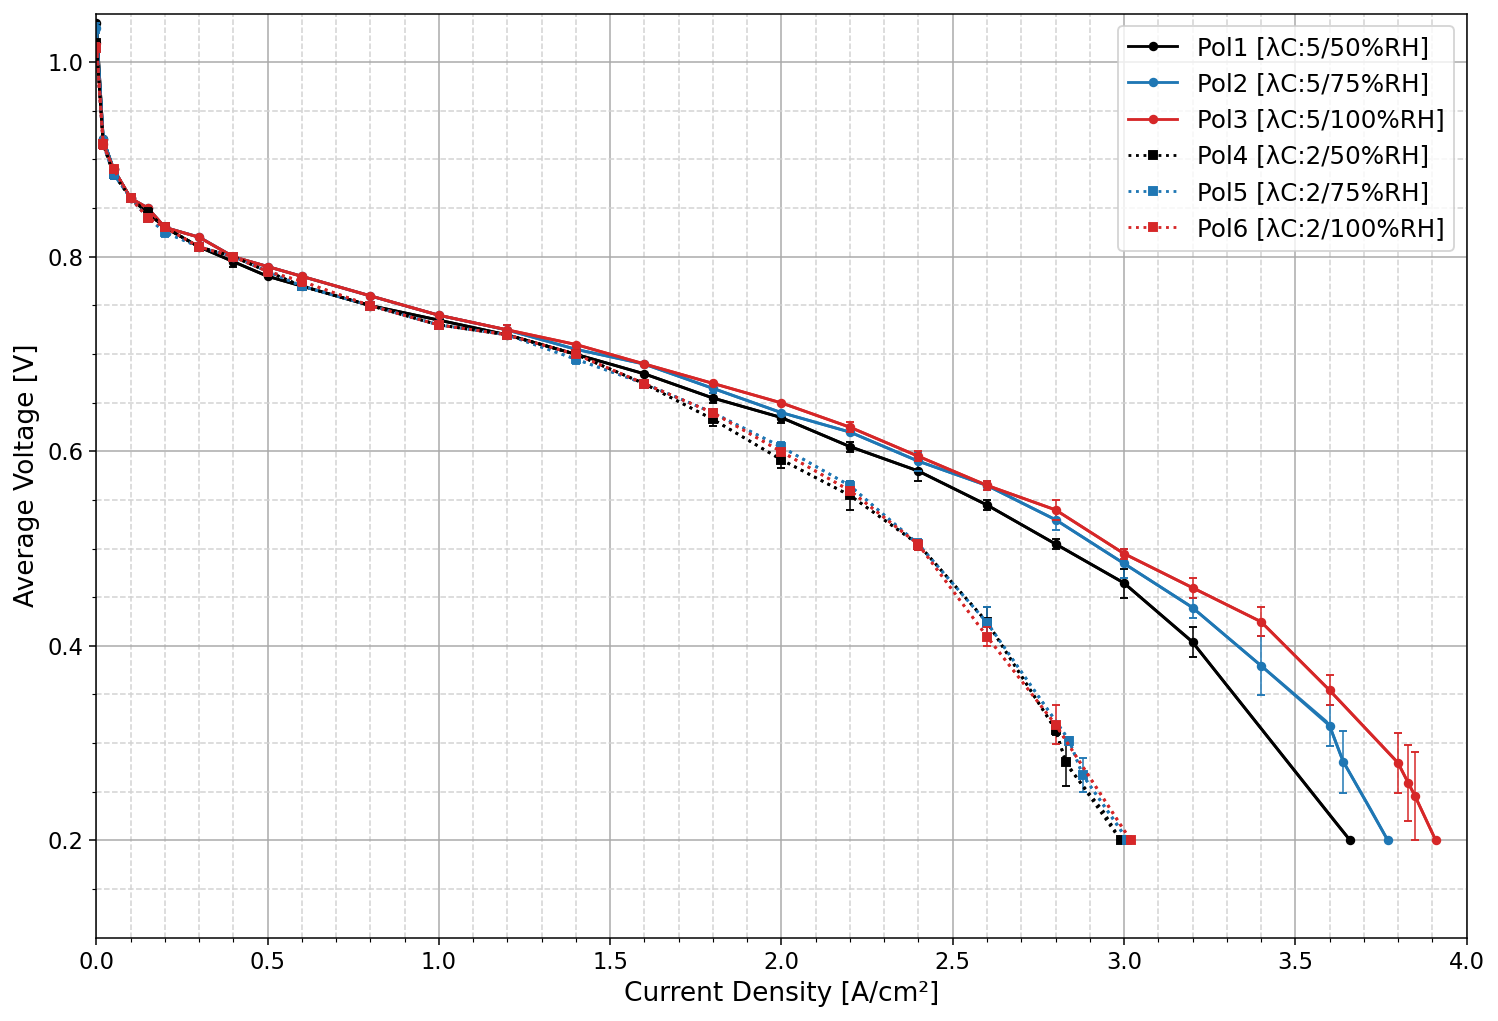

In [5]:
from scipy import interpolate

marker_list = ['o', 's', 'X', 'h', '8', '*']
color_list = ['black', 'tab:blue', 'tab:red', 'black', 'tab:blue', 'tab:red']
marker_new = ['o', 'o', 'o', 's',  's',  's']
line_style = ['solid', 'solid', 'solid', 'dotted', 'dotted', 'dotted',]
hum_label = ['[λC:5/50%RH]', '[λC:5/75%RH]', '[λC:5/100%RH]', '[λC:2/50%RH]',
             '[λC:2/75%RH]', '[λC:2/100%RH]']
temp = [60, 70, 80]
xrange=(0, 4)
yrange=(0.1, 1.05)
comp = ['60']

fig = plt.figure(figsize=(13, 9), dpi=136)
ax1 = fig.add_subplot(111)
for val in range(6):
    haha = data_80_old.dict_chosen_df[f'{val+1}'].copy()
    haha['V'] = haha['V'].round(decimals=2)
    haha2 = data_80_old.dict_chosen_df[f'{val+1}'].copy()
    haha2['CD'] = haha2['CD'].round(decimals=2)
    hehe = data_80_lat.dict_chosen_df[f'{val+1}'].copy()
    hehe['V'] = hehe['V'].round(decimals=2)
    hehe2 = data_80_lat.dict_chosen_df[f'{val+1}'].copy()
    hehe2['CD'] = hehe2['CD'].round(decimals=2)

    yo = pd.merge(haha.set_index('V'), hehe.set_index('V'), how='outer', on='V')
    yo = yo.sort_index()
    ye = pd.merge(haha2.set_index('CD'), hehe2.set_index('CD'), how='outer',
              on='CD')
    ye = ye.sort_index()

    func = interpolate.interp1d(yo['CD_x'], yo.index, kind= 'slinear',
                            fill_value='extrapolate')
    func2 = interpolate.interp1d(yo['CD_y'], yo.index, kind= 'slinear',
                             fill_value='extrapolate')
    func4 = interpolate.interp1d(ye['V_x'], ye.index, kind= 'linear',
                             fill_value='extrapolate')
    func5 = interpolate.interp1d(ye['V_y'], ye.index, kind= 'linear',
                             fill_value='extrapolate')

    xnew = np.arange(0, 4.01, 0.01)
    ynew = func(xnew)
    ynew2 = func2(xnew)

    y2new = np.arange(0.2, 1, 0.01)
    x2new4 = func4(y2new)
    x2new5 = func5(y2new)

    trai = (ynew+ynew2)/2
    highest = int((((x2new4+x2new5)/2)[0]*100).round(decimals=0))
    trai[highest] = 0.2
    trais = pd.Series(trai)
    ttrais = trais.copy()


    traiyo = ye.copy()
    traiyo = traiyo.drop([x for x in traiyo.index if x > (highest+1)/100])
    trais = trais.dropna()
    trais2 = ttrais.iloc[[int(x) for x in list(np.array(traiyo.index)*100)]]
    trais2 = trais2.dropna()
    trais3 = pd.concat([trais2, pd.Series([0.2], index=[highest])])
    data_std = pd.DataFrame(index=xnew, data={'col1':ynew, 'col2':ynew2})\
        .to_numpy()
    std_val = pd.Series(np.std(data_std, axis=1, ddof=0))# / np.sqrt(2))
    std_val = std_val.iloc[[int(x) for x in list(np.array(traiyo.index)*100)]]
    std_val.index = (std_val.index+1)/100-0.01


    ax1.plot(((trais.index+1)/100-0.01).dropna(), trais,
             color=color_list[val], linestyle=line_style[val])
    # ax1.plot(((trais.index+1)/100-0.01).dropna(), trais,
    #          color=color_list[val], linestyle=line_style[val])
    ax1.plot(((trais3.index+1)/100-0.01),  trais3,
             label=f'Pol{val+1} {hum_label[val]}',
             marker=marker_new[val], markersize=4, color=color_list[val],
             linestyle=line_style[val])
             # linestyle=line_style[val])
    plt.errorbar(((trais2.index+1)/100-0.01),  trais2.dropna(), yerr=std_val
                 .dropna(),
                 # yerr=std_dict[f'{enum+1}']['V'],
                                  linestyle='None', capsize=2,
                         color=color_list[val], elinewidth=0.8)
ax1.legend(fontsize=13)

ax1.set_xlim(xrange)
ax1.set_xlabel('Current Density [A/cm²]', fontsize=14)
ax1.set_ylim(yrange)
ax1.set_ylabel('Average Voltage [V]', fontsize=14)

ax1.minorticks_on()
ax1.tick_params(axis='both', which='major', labelsize=12)
plt.grid()
ax1.grid(True, which='minor', color='lightgrey', linestyle='--')
ax1.grid(True, which='major', color= 'darkgrey')
# plt.savefig('generated/thesis/60pc.pdf')
# plt.savefig('generated/thesis/60pc.png')
# plt.show()

In [27]:
trais2

0      0.985000
2      0.905360
5      0.875161
10     0.840174
15     0.820128
20     0.800158
30     0.775200
40     0.745129
50     0.719806
60     0.694247
80     0.643573
100    0.569400
120    0.529392
140    0.498464
160    0.389851
180    0.310235
dtype: float64

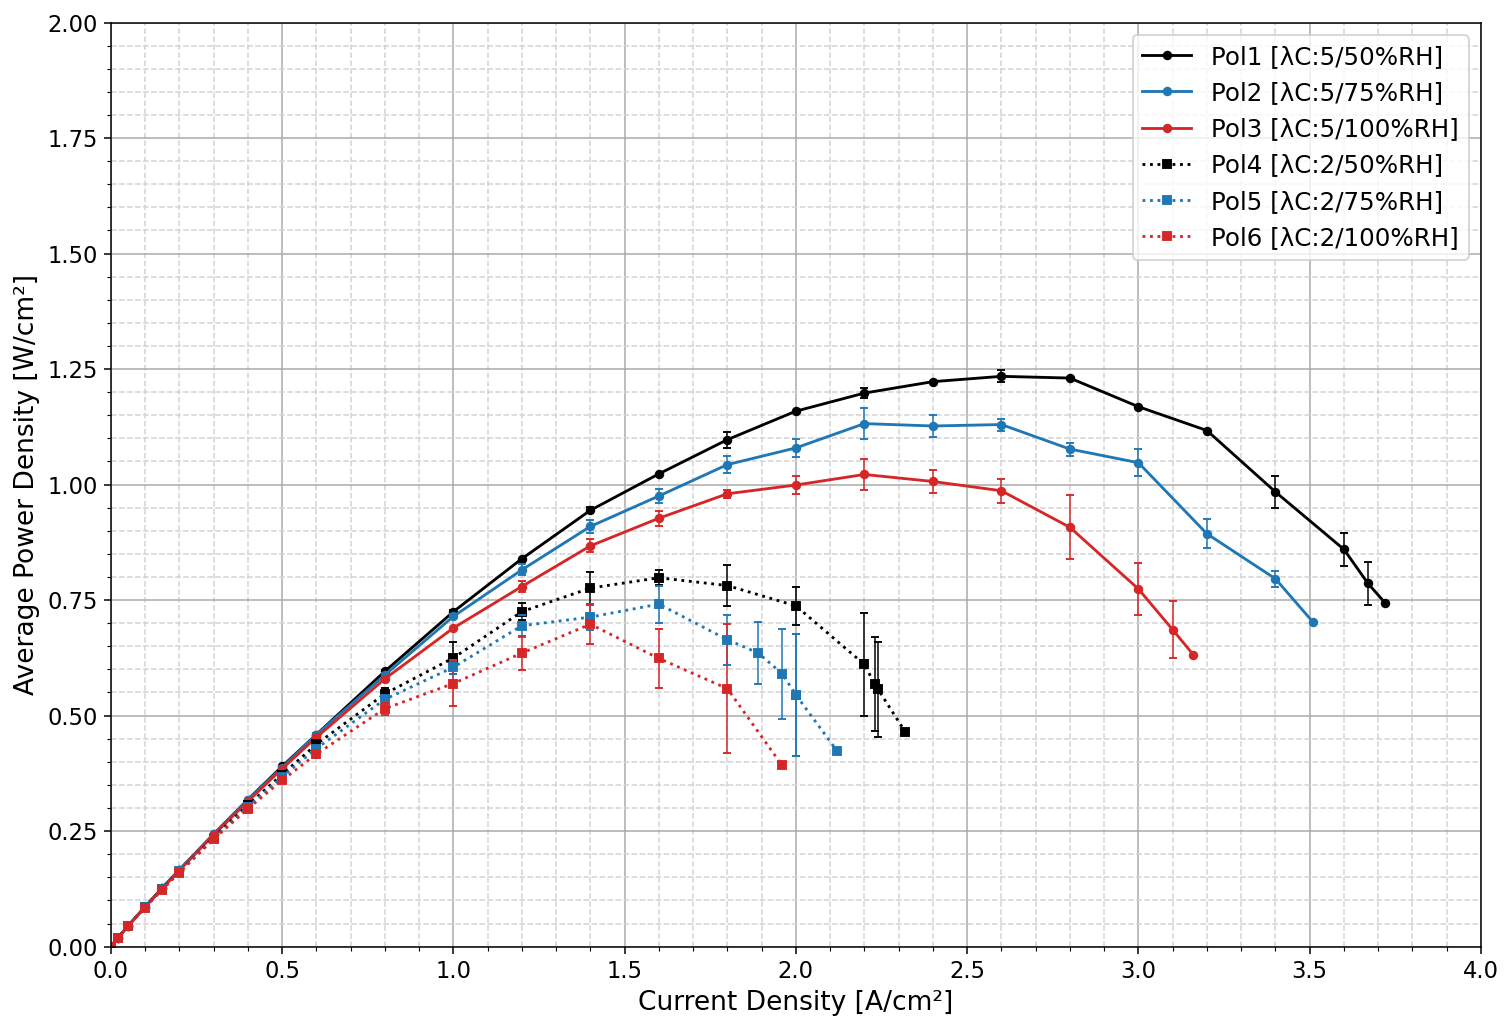

In [40]:
from scipy import interpolate

marker_list = ['o', 's', 'X', 'h', '8', '*']
color_list = ['black', 'tab:blue', 'tab:red', 'black', 'tab:blue', 'tab:red']
marker_new = ['o', 'o', 'o', 's',  's',  's']
line_style = ['solid', 'solid', 'solid', 'dotted', 'dotted', 'dotted',]
hum_label = ['[λC:5/50%RH]', '[λC:5/75%RH]', '[λC:5/100%RH]', '[λC:2/50%RH]',
             '[λC:2/75%RH]', '[λC:2/100%RH]']
temp = [60, 70, 80]
xrange=(0, 4)
yrange=(0, 2)
comp = ['60']

fig = plt.figure(figsize=(13, 9), dpi=136)
ax1 = fig.add_subplot(111)
for val in range(6):
    haha = data_60_old.dict_chosen_df[f'{val+1}'].copy()
    haha['V'] = haha['V'].round(decimals=2)
    haha2 = data_60_old.dict_chosen_df[f'{val+1}'].copy()
    haha2['CD'] = haha2['CD'].round(decimals=2)
    hehe = data_60_new.dict_chosen_df[f'{val+1}'].copy()
    hehe['V'] = hehe['V'].round(decimals=2)
    hehe2 = data_60_new.dict_chosen_df[f'{val+1}'].copy()
    hehe2['CD'] = hehe2['CD'].round(decimals=2)

    yo = pd.merge(haha.set_index('V'), hehe.set_index('V'), how='outer', on='V')
    yo = yo.sort_index()
    ye = pd.merge(haha2.set_index('CD'), hehe2.set_index('CD'), how='outer',
              on='CD')
    ye = ye.sort_index()

    func = interpolate.interp1d(yo['CD_x'], yo.index, kind= 'slinear',
                            fill_value='extrapolate')
    func2 = interpolate.interp1d(yo['CD_y'], yo.index, kind= 'slinear',
                             fill_value='extrapolate')
    func4 = interpolate.interp1d(ye['V_x'], ye.index, kind= 'linear',
                             fill_value='extrapolate')
    func5 = interpolate.interp1d(ye['V_y'], ye.index, kind= 'linear',
                             fill_value='extrapolate')

    xnew = np.arange(0, 4.01, 0.01)
    ynew = func(xnew)
    ynew2 = func2(xnew)

    y2new = np.arange(0.2, 1, 0.01)
    x2new4 = func4(y2new)
    x2new5 = func5(y2new)

    trai = (ynew+ynew2)/2
    highest = int((((x2new4+x2new5)/2)[0]*100).round(decimals=0))
    trai[highest] = 0.2
    trais = pd.Series(trai)
    ttrais = trais.copy()


    traiyo = ye.copy()
    traiyo = traiyo.drop([x for x in traiyo.index if x > (highest+1)/100])
    trais = trais.dropna()
    trais2 = ttrais.iloc[[int(x) for x in list(np.array(traiyo.index)*100)]]
    trais2 = trais2.dropna()
    trais3 = pd.concat([trais2, pd.Series([0.2], index=[highest])])
    data_std = pd.DataFrame(index=xnew, data={'col1':ynew, 'col2':ynew2})\
        .to_numpy()
    std_val = pd.Series(np.std(data_std, axis=1, ddof=0))# / np.sqrt(2))
    std_val = std_val.iloc[[int(x) for x in list(np.array(traiyo.index)*100)]]
    std_val.index = (std_val.index+1)/100-0.01
    std_val = std_val.dropna()*((trais2.index+1)/100-0.01)


    # ax1.plot(((trais.index+1)/100-0.01), trais*((trais.index+1)/100-0.01),
    #          color=color_list[val], linestyle=line_style[val])
    ax1.plot(((trais3.index+1)/100-0.01),  trais3*((trais3.index+1)/100-0.01),
             label=f'Pol{val+1} {hum_label[val]}',
             marker=marker_new[val], markersize=4, color=color_list[val],
             linestyle=line_style[val],
             # linestyle='None',
             )
             # linestyle=line_style[val])
    plt.errorbar(((trais2.index+1)/100-0.01),  trais2*((trais2.index+1)/100-0.01), yerr=std_val
                 .dropna(),
                 # yerr=std_dict[f'{enum+1}']['V'],
                                  linestyle='None', capsize=2,
                         color=color_list[val], elinewidth=0.8)
ax1.legend(fontsize=13)

ax1.set_xlim(xrange)
ax1.set_xlabel('Current Density [A/cm²]', fontsize=14)
ax1.set_ylim(yrange)
ax1.set_ylabel('Average Power Density [W/cm²]', fontsize=14)

ax1.minorticks_on()
ax1.tick_params(axis='both', which='major', labelsize=12)
plt.grid()
ax1.grid(True, which='minor', color='lightgrey', linestyle='--')
ax1.grid(True, which='major', color= 'darkgrey')
plt.savefig('generated/thesis/60pd.pdf')
plt.savefig('generated/thesis/60pd.png')
plt.show()

In [374]:
std_val

0.00    0.020000
0.02    0.010044
0.05    0.014973
0.10    0.019975
0.15    0.020000
0.20    0.020000
0.30    0.024877
0.40    0.034948
0.50    0.040117
0.60    0.050431
0.80    0.080890
1.00    0.129942
1.20    0.125762
1.40    0.170697
1.60    0.216363
1.63         NaN
1.80         NaN
2.00         NaN
2.20         NaN
2.40         NaN
2.60         NaN
dtype: float64

In [296]:
wow = pd.Series(np.std(pd.DataFrame(index=xnew, data={'col1':ynew,
                                                      'col2':ynew2})
          .to_numpy(), axis=1))
# wow # = (wow.index+1)/100-0.01
# wow.iloc[list(traiyo.index)]
# wow
wow = wow.iloc[[int(x) for x in list(np.array(traiyo.index)*100)]]
wow.index = (wow.index+1)/100-0.01
wow
# pd.DataFrame(index=xnew, data={'col1':ynew, 'col2':ynew2}).to_numpy()

0.00    4.999920e-03
0.02    5.001699e-03
0.05    5.000317e-03
0.10    2.464321e-05
0.15    2.036032e-07
0.20    3.978468e-07
0.30    4.843366e-03
0.40    5.213113e-03
0.50    1.019447e-02
0.60    1.497516e-02
0.80    1.562385e-02
1.00    4.967009e-02
1.20    3.005134e-02
1.40    3.017633e-02
1.60    3.946469e-02
1.80    7.775034e-02
1.86             NaN
dtype: float64

In [ ]:
pd.concat([(ynew+ynew2)/2, ])

In [108]:
ynew3.round(decimals=3)

array([1.02 , 0.965, 0.91 , 0.903, 0.897, 0.89 , 0.884, 0.878, 0.872,
       0.866, 0.86 , 0.858, 0.856, 0.854, 0.852, 0.85 , 0.846, 0.842,
       0.838, 0.834, 0.83 , 0.828, 0.826, 0.824, 0.822, 0.82 , 0.818,
       0.816, 0.814, 0.812, 0.81 , 0.809, 0.808, 0.807, 0.806, 0.805,
       0.804, 0.803, 0.802, 0.801, 0.8  , 0.798, 0.796, 0.794, 0.792,
       0.79 , 0.788, 0.786, 0.784, 0.782, 0.78 , 0.779, 0.778, 0.777,
       0.776, 0.775, 0.774, 0.773, 0.772, 0.771, 0.77 , 0.769, 0.768,
       0.767, 0.766, 0.765, 0.764, 0.763, 0.762, 0.761, 0.76 , 0.759,
       0.758, 0.757, 0.756, 0.755, 0.754, 0.753, 0.752, 0.751, 0.75 ,
       0.749, 0.748, 0.747, 0.746, 0.745, 0.744, 0.743, 0.742, 0.741,
       0.74 , 0.739, 0.738, 0.737, 0.736, 0.735, 0.734, 0.733, 0.732,
       0.731, 0.73 , 0.728, 0.727, 0.725, 0.724, 0.722, 0.72 , 0.719,
       0.717, 0.716, 0.714, 0.713, 0.711, 0.71 , 0.708, 0.707, 0.705,
       0.704, 0.702, 0.701, 0.7  , 0.699, 0.698, 0.697, 0.696, 0.695,
       0.694, 0.693,

In [14]:
ynew

array([0.98000016, 0.94017917, 0.90035818, 0.89011353, 0.88013733,
       0.87016112, 0.8641072 , 0.85811766, 0.85212812, 0.84613858,
       0.84014904, 0.83610518, 0.83211098, 0.82811678, 0.82412257,
       0.82012837, 0.81613447, 0.81214057, 0.80814668, 0.80415279,
       0.8001589 , 0.79714221, 0.79416602, 0.79118982, 0.78821362,
       0.78523743, 0.78226123, 0.77928504, 0.77630884, 0.77333265,
       0.77035645, 0.76731981, 0.76427493, 0.76123006, 0.75818519,
       0.75514032, 0.75209545, 0.74905058, 0.74600571, 0.74296084,
       0.73991637, 0.73688613, 0.73385588, 0.73082564, 0.72779539,
       0.72476515, 0.72173491, 0.71870466, 0.71567442, 0.71264417,
       0.70961146, 0.7065618 , 0.70351215, 0.70046249, 0.69741284,
       0.69436319, 0.69131353, 0.68826388, 0.68521422, 0.68216457,
       0.67927135, 0.67676072, 0.67425009, 0.67173946, 0.66922883,
       0.6667182 , 0.66420757, 0.66169694, 0.65918631, 0.65667568,
       0.65416505, 0.65165442, 0.64914379, 0.64663316, 0.64412

In [40]:
data_60_old.dict_chosen_df['6'].fillna(0) + data_60_new.dict_chosen_df['6']\
    .fillna(0)

CD         V       HFR
0   3.918190  0.400942  2.035143
1   3.194275  0.857196  0.000000
2   2.792139  0.939126  0.000000
3   2.394618  1.044108  0.000000
4   1.992523  1.190065  1.826000
5   1.594009  1.298028  0.000000
6   1.294691  1.366679  2.200000
7   0.996625  1.450629  2.182857
8   0.801200  1.499162  2.197143
9   0.601551  1.552086  4.248571
10  0.450537  1.594564  2.251429
11  0.300645  1.642553  2.270000
12  0.200482  1.695232  2.280000
13  0.120338  1.747391  2.290000
14  0.050162  1.854124  2.277143
15       NaN       NaN       NaN
16       NaN       NaN       NaN

In [31]:
std_dict = {}
d1, d2 = data_60_new.dict_chosen_df, data_60_old.dict_chosen_df
for num in range(6):
    avg = (d1[f'{num+1}'] + d2[f'{num+1}'])/2

    std = (((d1[f'{num+1}']-avg).pow(2)+(d2[f'{num+1}']-avg).pow(2))/2).pow(0.5)
    std_dict.update({f'{num+1}': std})
std_dict


{'1':               CD         V       HFR
 0   4.074339e-02  0.000677  0.644214
 1   3.144000e-05  0.011386  0.021429
 2   9.716000e-05  0.012158       NaN
 3   6.738857e-05  0.004528       NaN
 4   2.328600e-04  0.003348  0.064714
 5   1.620971e-04  0.000569  0.066000
 6   1.352743e-04  0.003158  0.053929
 7   1.566200e-04  0.000220  0.051714
 8   2.014314e-04  0.005107  0.039000
 9   1.823143e-05  0.000806  0.048286
 10  2.286343e-04  0.006693  0.031929
 11  2.638657e-04  0.003594  0.041714
 12  2.389371e-04  0.005563  0.029214
 13  3.664571e-04  0.002253  0.033643
 14  6.898286e-05  0.004531  0.019071
 15  1.170686e-04  0.001165  0.031571
 16  6.716571e-05  0.003721  0.005071
 17  5.252200e-04  0.002492  0.023643
 18  9.342857e-05  0.003206  0.015786
 19  1.017549e-03  0.001962  0.048214
 20  7.400000e-07  0.002128  0.011571
 21  4.457143e-07  0.002577  0.003643
 22  2.342857e-07  0.002080  0.008571
 23  5.657143e-07  0.002286  0.000357
 24  6.885714e-07  0.002777  0.009714
 25  0.

SystemExit: 

C:\Users\kamal\anaconda3\envs\ZBTanac\lib\site-packages\IPython\core\interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


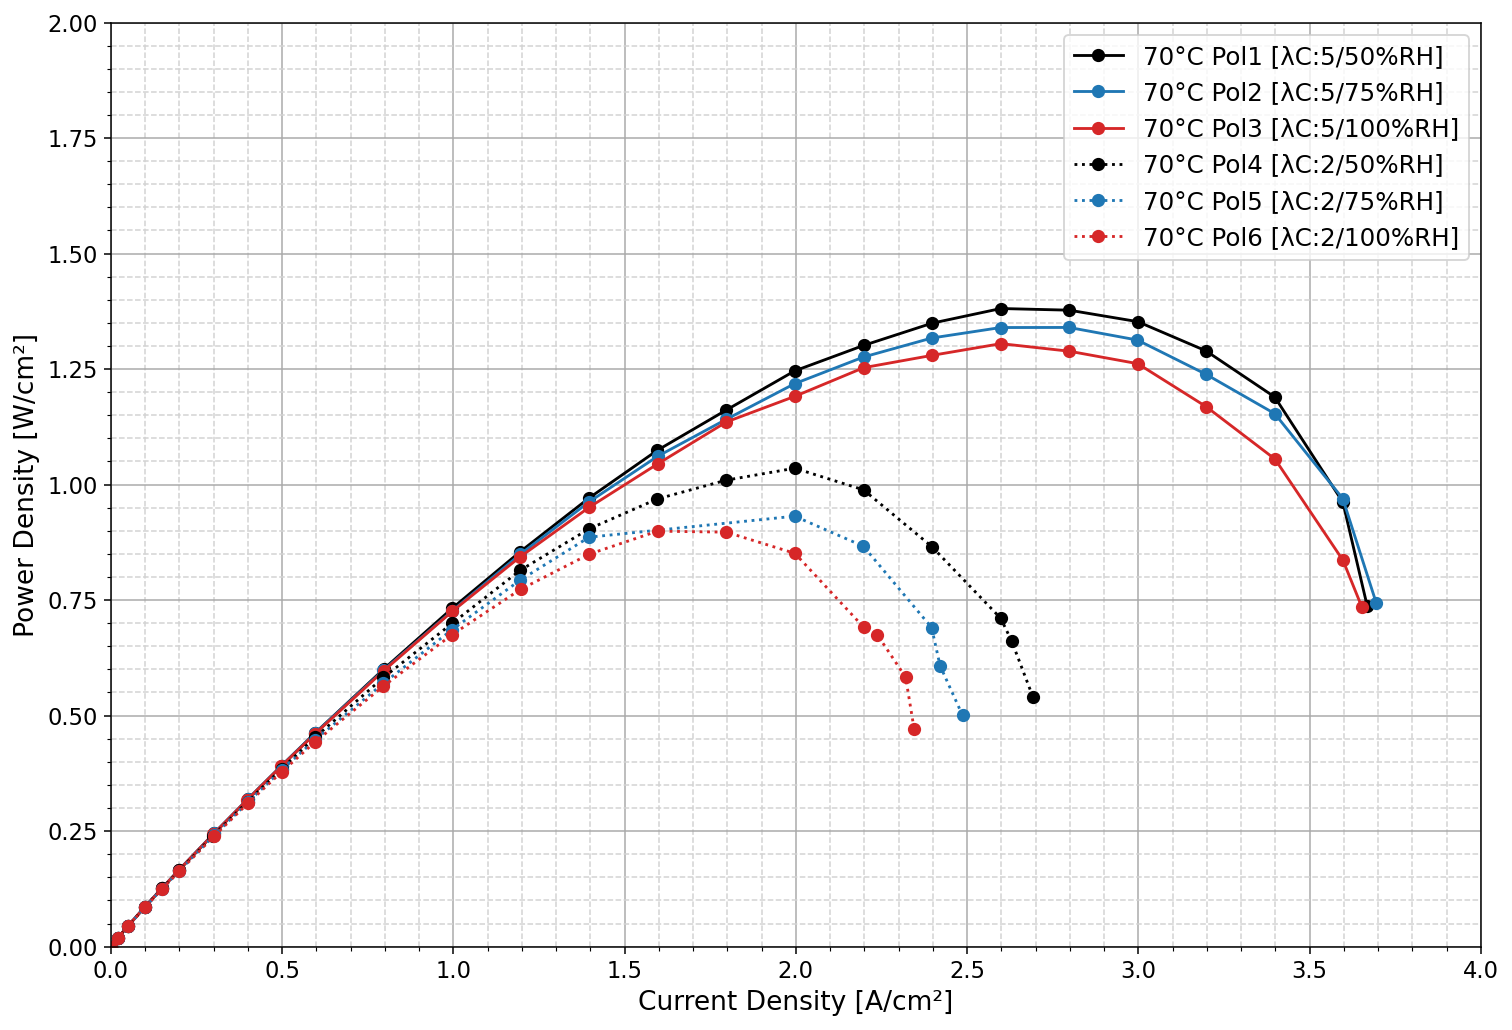

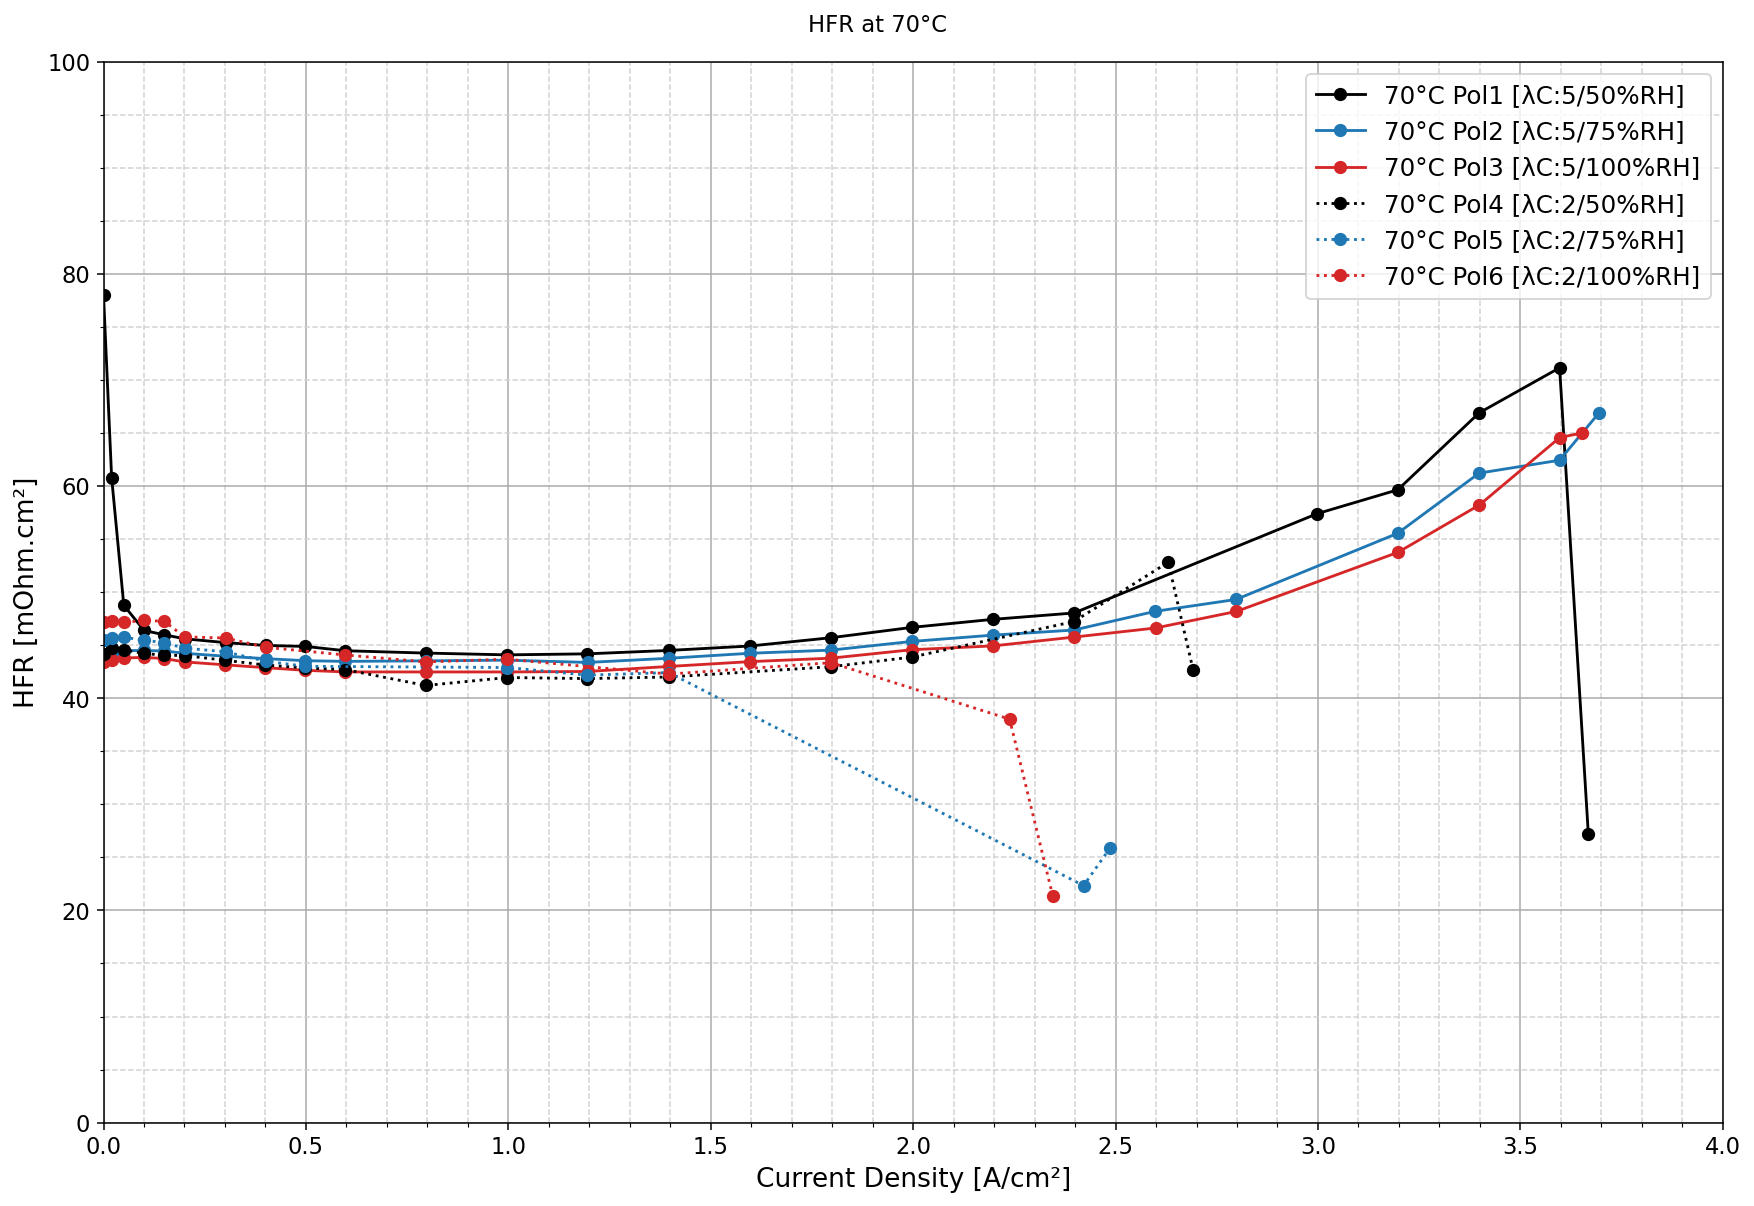

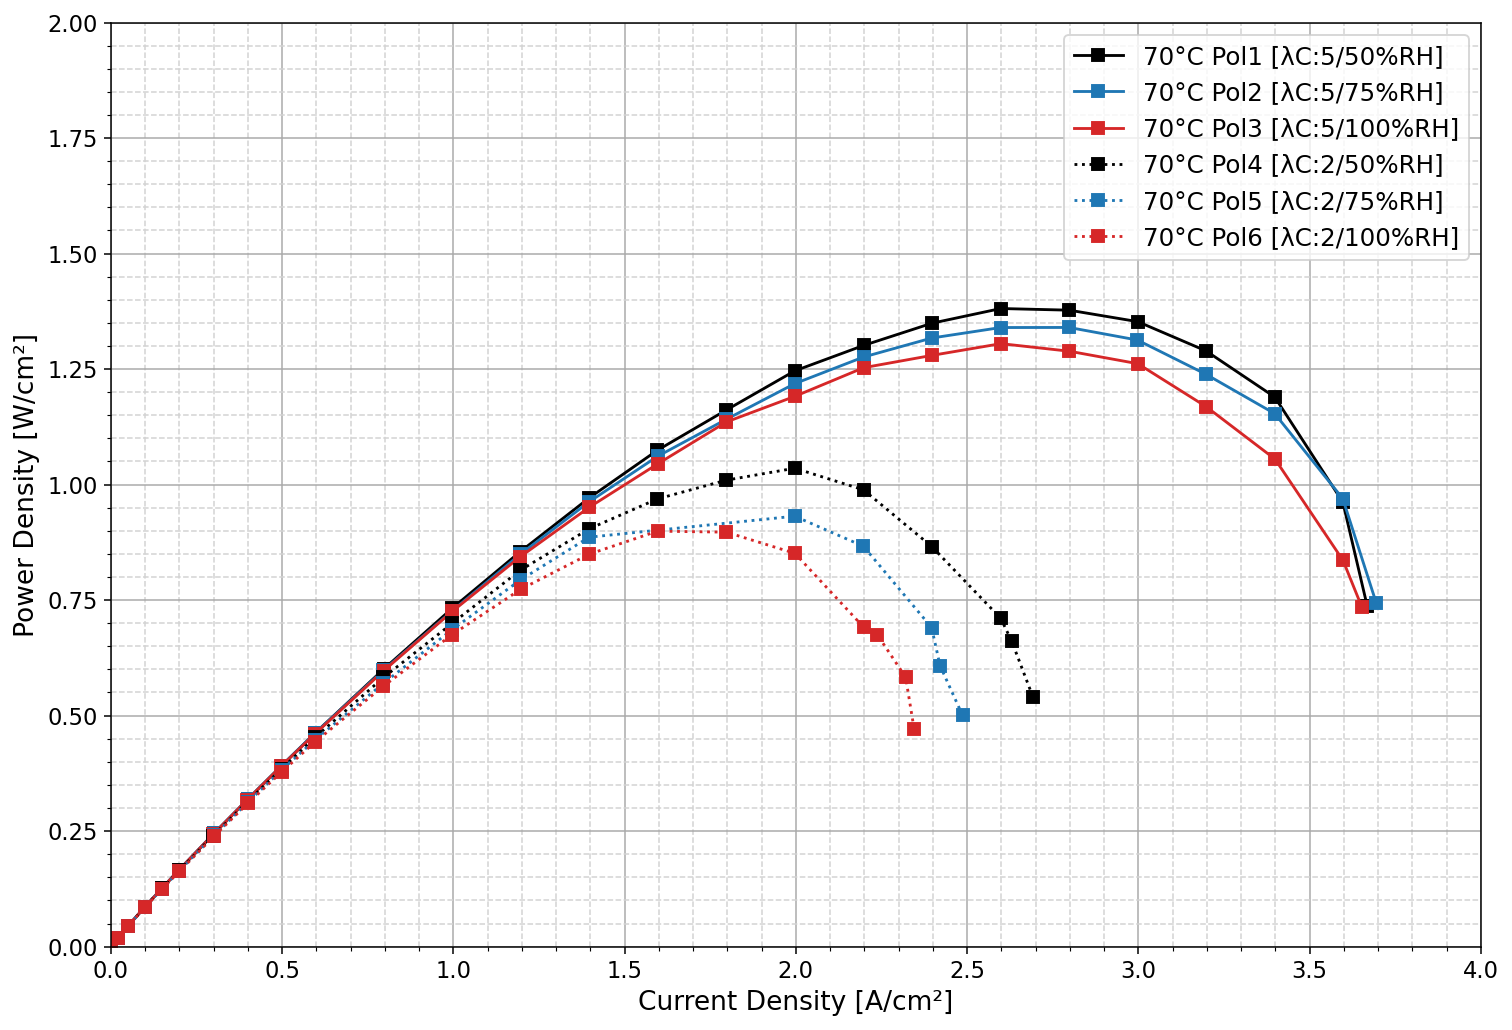

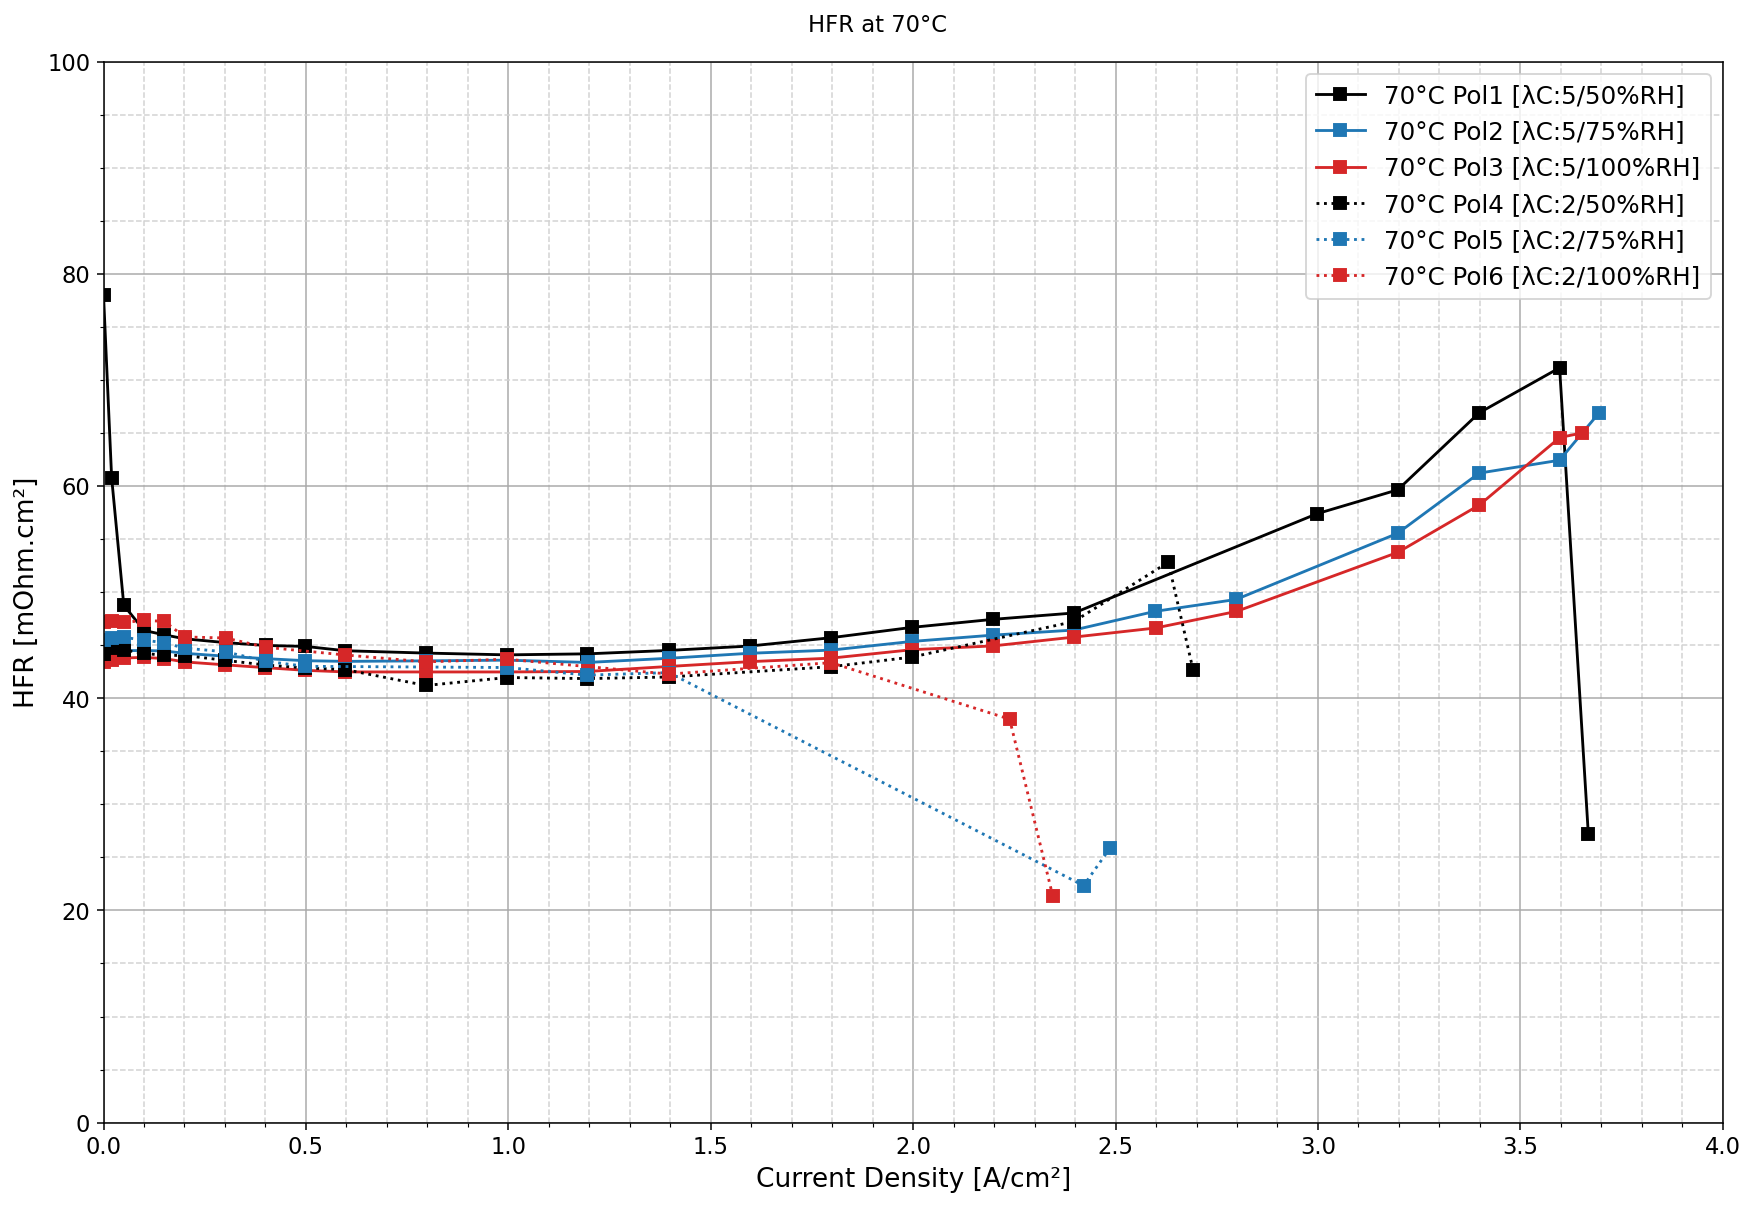

In [42]:
import matplotlib.backends.backend_pdf
import sys

marker_list = ['o', 's', 'X', 'h', '8', '*']
color_list = ['black', 'tab:blue', 'tab:red', 'black', 'tab:blue', 'tab:red',]
marker_new = ['o', 's']
line_style = ['solid', 'solid', 'solid', 'dotted', 'dotted', 'dotted',]
hum_label = ['[λC:5/50%RH]', '[λC:5/75%RH]', '[λC:5/100%RH]', '[λC:2/50%RH]',
             '[λC:2/75%RH]', '[λC:2/100%RH]']
temp = [60, 70, 80]
xrange=(0, 4.0)
yrange=(0.1, 1.05)
y2range=(0, 2.0)
comp = ['70', '70']
ffile = 'generated/thesis/'

# onepdf = matplotlib.backends.backend_pdf.PdfPages(f"{ffile}pc_new_try"
#                                                   ".pdf")

for num, obj in enumerate([data_70_new, data_70_new]):
    fig = plt.figure(figsize=(13, 9), dpi=136)
    fig3 = plt.figure(figsize=(13, 9), dpi=136)
    ax3 = fig3.add_subplot(111)
    ax1 = fig.add_subplot(111)
    # ax2 = ax1.twinx()
    for enum, (key, val) in enumerate(obj.dict_chosen_df.items()):
        cur = val['CD'] # / 25
        vol = val['V']
        hfr = val['HFR']
        axis = []
        for h, c in zip(hfr, cur):
            if h > 0:
                axis.append([c, h * 25])
        ax_df = pd.DataFrame(axis, columns=['CD', 'HFR'])

        ax1.plot(cur, vol*cur, label=f'{comp[num]}°C Pol{key} '
                                     f'{hum_label[enum]}',
                             marker=marker_new[num],
                             color=color_list[int(key)-1],
                             linestyle=line_style[enum])
        ax3.plot(ax_df['CD'], ax_df['HFR'],
                 label=f'{comp[num]}°C Pol{key} {hum_label[enum]}',
                 marker=marker_new[num],color=color_list[int(key)-1],
                 linestyle=line_style[enum])
        # ax2.scatter(cur, vol, marker=marker_new[int(key)-1],
        #             color=color_list[int(key)-1], label=hum_label[int(key)-1])
        line, label = ax1.get_legend_handles_labels()
    ax1.legend(fontsize=13)
    ax3.legend(fontsize=13)
    # ax2.legend()
    # fig.suptitle(f'Polarisation Curves at {comp[num]}°C')
    fig3.suptitle(f'HFR at {comp[num]}°C')
    ax1.minorticks_on()
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax3.minorticks_on()
    ax3.tick_params(axis='both', which='major', labelsize=12)
    plt.grid(True)
    ax1.grid(True, which='minor', color='lightgrey', linestyle='--')
    ax1.grid(True, which='major', color= 'darkgrey')
    ax3.grid(True, which='minor', color='lightgrey', linestyle='--')
    ax3.grid(True, which='major', color= 'darkgrey')
    ax1.set_xlim(xrange)
    ax1.set_xlabel('Current Density [A/cm²]', fontsize=14)
    ax1.set_ylim(y2range)
    ax1.set_ylabel('Power Density [W/cm²]', fontsize=14)
    ax3.set_xlim(xrange)
    ax3.set_xlabel('Current Density [A/cm²]', fontsize=14)
    ax3.set_ylim(0, 100)
    ax3.set_ylabel('HFR [mOhm.cm²]', fontsize=14)

    plt.tight_layout()
    fig.savefig(f'{ffile}{comp[num]}PD.png')
    # fig3.savefig(f'{ffile}{comp[num]}HFR.png')
    # onepdf.savefig(fig)
    # onepdf.savefig(fig3)

sys.exit()
for plot in ['ALL', 1, 2, 3, 4, 5, 6]:
    fig = plt.figure(figsize=(15, 9), dpi=136)
    ax1 = fig.add_subplot(111)
    fig3 = plt.figure(figsize=(15, 9), dpi=136)
    ax3 = fig3.add_subplot(111)
    # ax2 = ax1.twinx()

    for num, obj in enumerate([data_70_old, data_70_new]):
        if not isinstance(plot, str):
            for enum, (key, val) in enumerate(obj.dict_chosen_df.items()):
                if str(plot) == key:
                    cur = val['CD'] # / 25
                    vol = val['V']
                    hfr = val['HFR']
                    axis = []
                    for h, c in zip(hfr, cur):
                        if h > 0:
                            axis.append([c, h * 25])
                    ax_df = pd.DataFrame(axis, columns=['CD', 'HFR'])
                    ax1.plot(cur, vol, label=f'{comp[num]}°C Pol{key} '
                                             f'{hum_label[enum]}',
                             marker=marker_new[num],
                             color=color_list[plot-1],
                             linestyle=line_style[enum])
                    ax3.plot(ax_df['CD'], ax_df['HFR'],
                    label=f'{comp[num]}°C Pol{key} {hum_label[enum]}',
                    marker=marker_new[num],color=color_list[int(key)-1],
                    linestyle=line_style[enum])
            line, label = ax1.get_legend_handles_labels()
            ax1.legend(fontsize=13)
            ax3.legend(fontsize=13)
            # ax2.legend()
            # fig.suptitle(f'Comparison Polarisation Curves Pol{plot} '
            #              f'{hum_label[plot-1]}')
            # fig3.suptitle(f'Comparison HFR Pol{plot} {hum_label[plot-1]}')
        else:
            if plot == 'ALL':
                ctr = 0
                for enum, (key, val) in enumerate(obj.dict_chosen_df.items()):
                    cur = val['CD'] # / 25
                    vol = val['V']
                    ax1.plot(cur, vol, label=f'{comp[num]}°C Pol{key} '
                                             f'{hum_label[enum]}',
                             marker=marker_new[num],
                             color=color_list[ctr],
                             linestyle=line_style[enum])
                    # plt.errorbar(cur, vol, xerr=std_dict[f'{enum+1}']['CD'],
                    #              yerr=std_dict[f'{enum+1}']['V'],
                    #              # linestyle='None',
                    #      color='black', elinewidth=10)
                    # ax1.scatter(cur, vol,  marker=marker_new[ctr],
                    #             color=color_list[ctr],
                    #             label=hum_label[ctr])
                    ctr+=1
                line, label = ax1.get_legend_handles_labels()
                ax1.legend(fontsize=11)
                # ax2.legend()

                # fig.suptitle('All Polarisation Curves')


    ax1.minorticks_on()

    plt.grid(True)
    ax1.grid(True, which='minor', color='lightgrey', linestyle='--')
    ax1.grid(True, which='major', color= 'darkgrey')
    ax1.set_xlim(xrange)
    # ax2.set_xlim(xrange)
    ax1.set_xlabel('Current [A.cm-2]')
    ax1.set_ylim(yrange)
    # ax2.set_ylim(yrange)
    ax1.set_ylabel('Voltage [V]')

    ax3.minorticks_on()
    ax3.tick_params(axis='both', which='major', labelsize=12)
    ax3.grid(True, which='minor', color='lightgrey', linestyle='--')
    ax3.grid(True, which='major', color= 'darkgrey')
    ax3.set_xlim(xrange)
    ax3.set_xlabel('Current [A.cm-2]', fontsize=14)
    ax3.set_ylim(0, 100)
    ax3.set_ylabel('HFR [mOhm.cm²]', fontsize=14)

    plt.tight_layout()
    fig.savefig(f'{ffile}{plot}.png')
    # fig3.savefig(f'{ffile}{plot}-HFR.png')
    # onepdf.savefig(fig)
    # onepdf.savefig(fig3)


fig2 = plt.figure(figsize=(13, 9), dpi=136)
ax1 = fig2.add_subplot(111)
# ax2 = ax1.twinx()
for enum, obj in enumerate([data_70_old, data_70_new]):
    ctr = 0
    for numnum, (key, val) in enumerate(obj.dict_chosen_df.items()):
        cur = val['CD'] # / 25
        vol = val['V']
        ax1.plot(cur, vol, label=f'{comp[enum]}°C Pol{key} {hum_label[numnum]}',
                         marker=marker_new[enum], color=color_list[ctr],
                         linestyle=line_style[numnum])
        # ax2.scatter(cur, vol, marker=marker_new[ctr],
        #                     color=color_list[ctr], label=hum_label[ctr])
        ctr+=1
    line, label = ax1.get_legend_handles_labels()
    ax1.legend(fontsize=11)
    # ax2.legend()

    plt.suptitle('Comparison between old and new polarisation curves at 70°C')
ax1.minorticks_on()
plt.grid(True)
ax1.grid(True, which='minor', color='lightgrey', linestyle='--')
ax1.grid(True, which='major', color= 'darkgrey')
ax1.set_xlim(xrange)
# ax2.set_xlim(xrange)
ax1.set_xlabel('Current [A.cm-2]')
ax1.set_ylim(yrange)
# ax2.set_ylim(yrange)
ax1.set_ylabel('Voltage [V]')
plt.tight_layout()
fig2.savefig(f'{ffile}comparison70.png')
# onepdf.savefig(fig2)


fig = plt.figure(figsize=(13, 9), dpi=136)
ax1 = fig.add_subplot(111)
for num, obj in enumerate([avg]):
    for key, val in obj.items():
        cur = int(key) # / 25
        vol = val['V'].iloc[-1:]
                # ax1.plot(cur, vol, label=f'Pol{key}')
        ax1.scatter(cur, vol, label=f'{comp[num]} OCV Pol{key}',
                    color=color_list[int(key)-1], marker=marker_new[num])
    line, label = ax1.get_legend_handles_labels()
    ax1.legend(Plot.flip(line, 6), Plot.flip(label,6),
                    loc='upper center', bbox_to_anchor=(0.5, -0.055),
                   fancybox=True, shadow=True, ncol=6)
plt.grid(True)
# plt.legend()
ax1.set_xlim(0, 6.5)
ax1.set_xlabel('Polarisation Curve')
ax1.set_ylim(0.95, 1.1)
ax1.set_ylabel('Voltage [V]')

plt.suptitle('OCV Comparison')
plt.tight_layout()
# fig.savefig('OCV.png')
# onepdf.savefig(fig)
# onepdf.close()


In [3]:
eis_80_old = EISData("C:/Users/kamal/Thesis-ZBT/datas/04_80_1st/eis",
                       'Case 3 (Old)')
eis_80_lat = EISData("C:/Users/kamal/Thesis-ZBT/datas/10_80_3rd/eis",
                       'Case 3 (Latest)')

eis_60_old = EISData("C:/Users/kamal/Thesis-ZBT/datas/05_60_1st/eis",
                           'Case 1 (Old)')
eis_60_new = EISData("C:/Users/kamal/Thesis-ZBT/datas/11_60 2nd/eis",
                           'Case 1 (New)')

eis_70_new = EISData("C:/Users/kamal/Thesis-ZBT/datas/08_70_3rd/eis",
                       'Case 2 (New)')

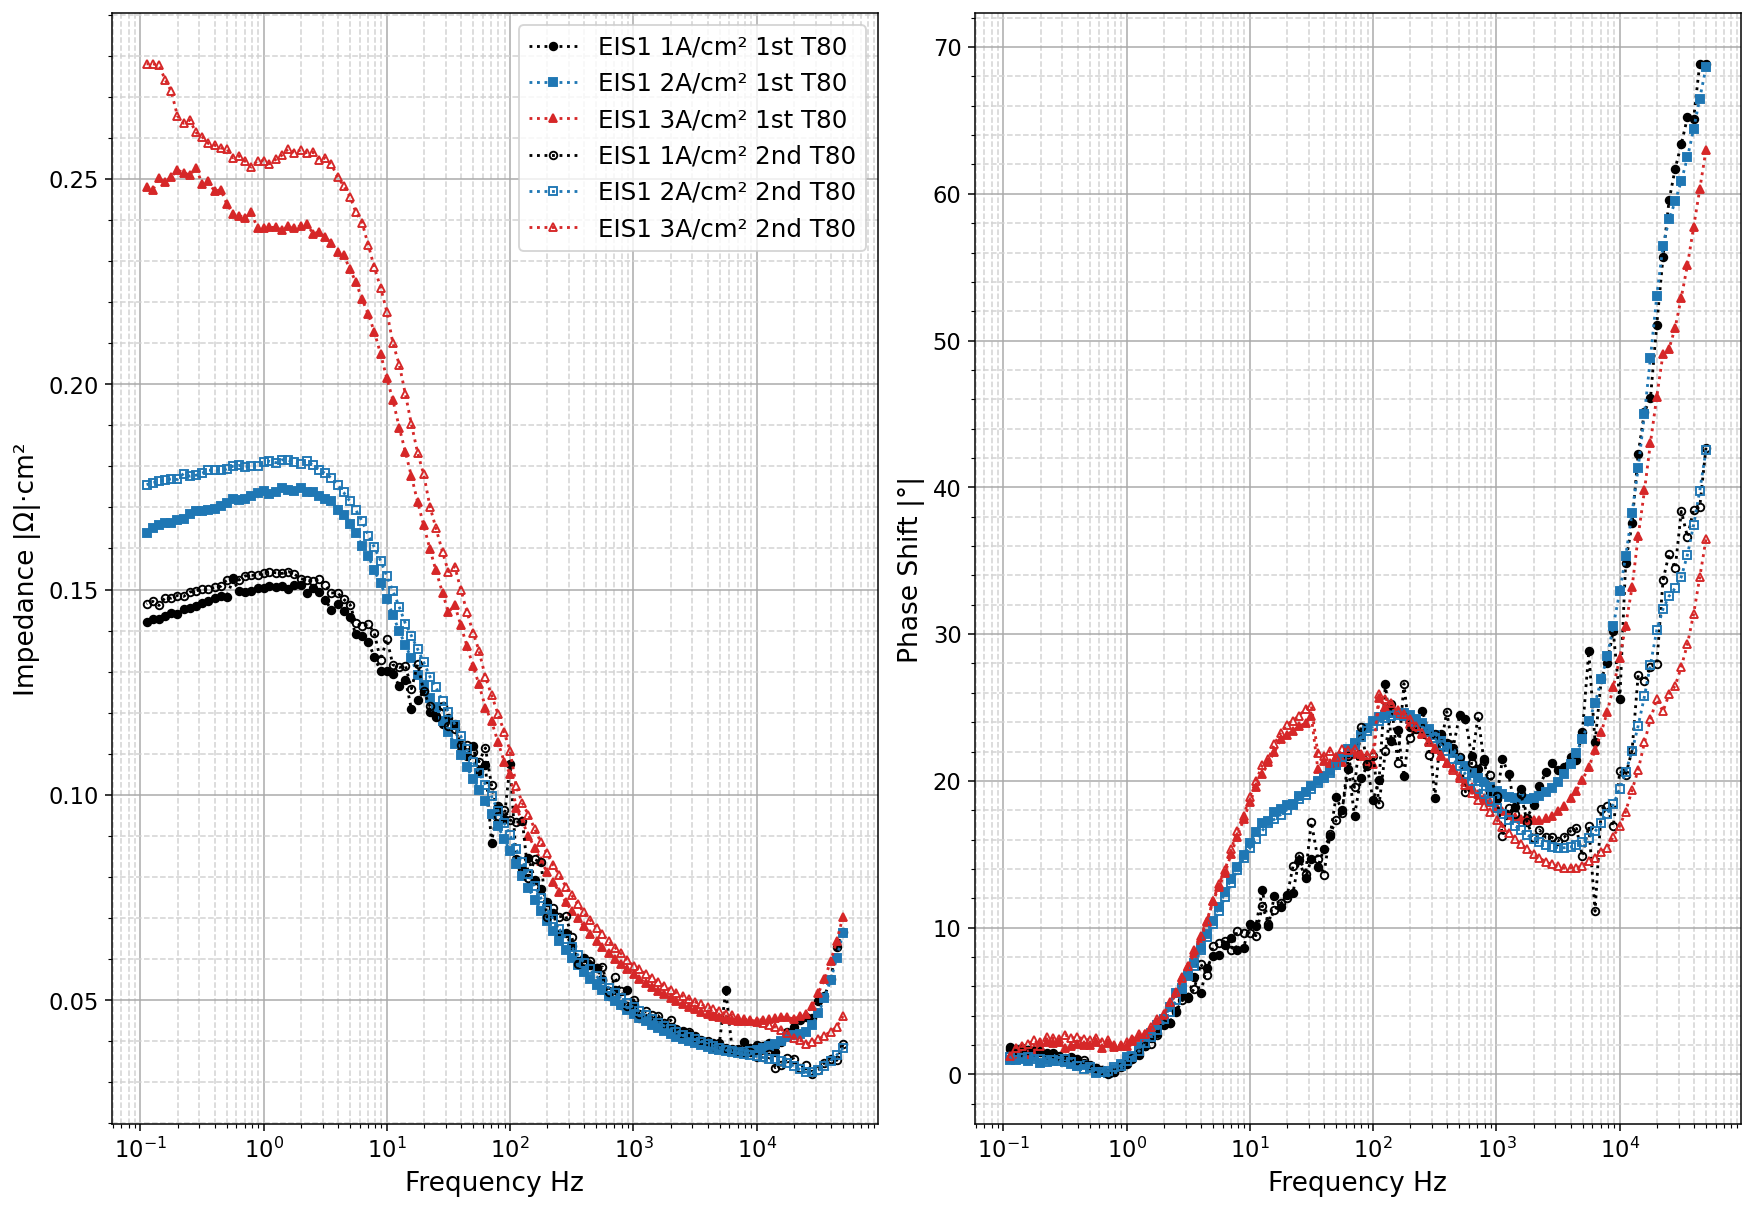

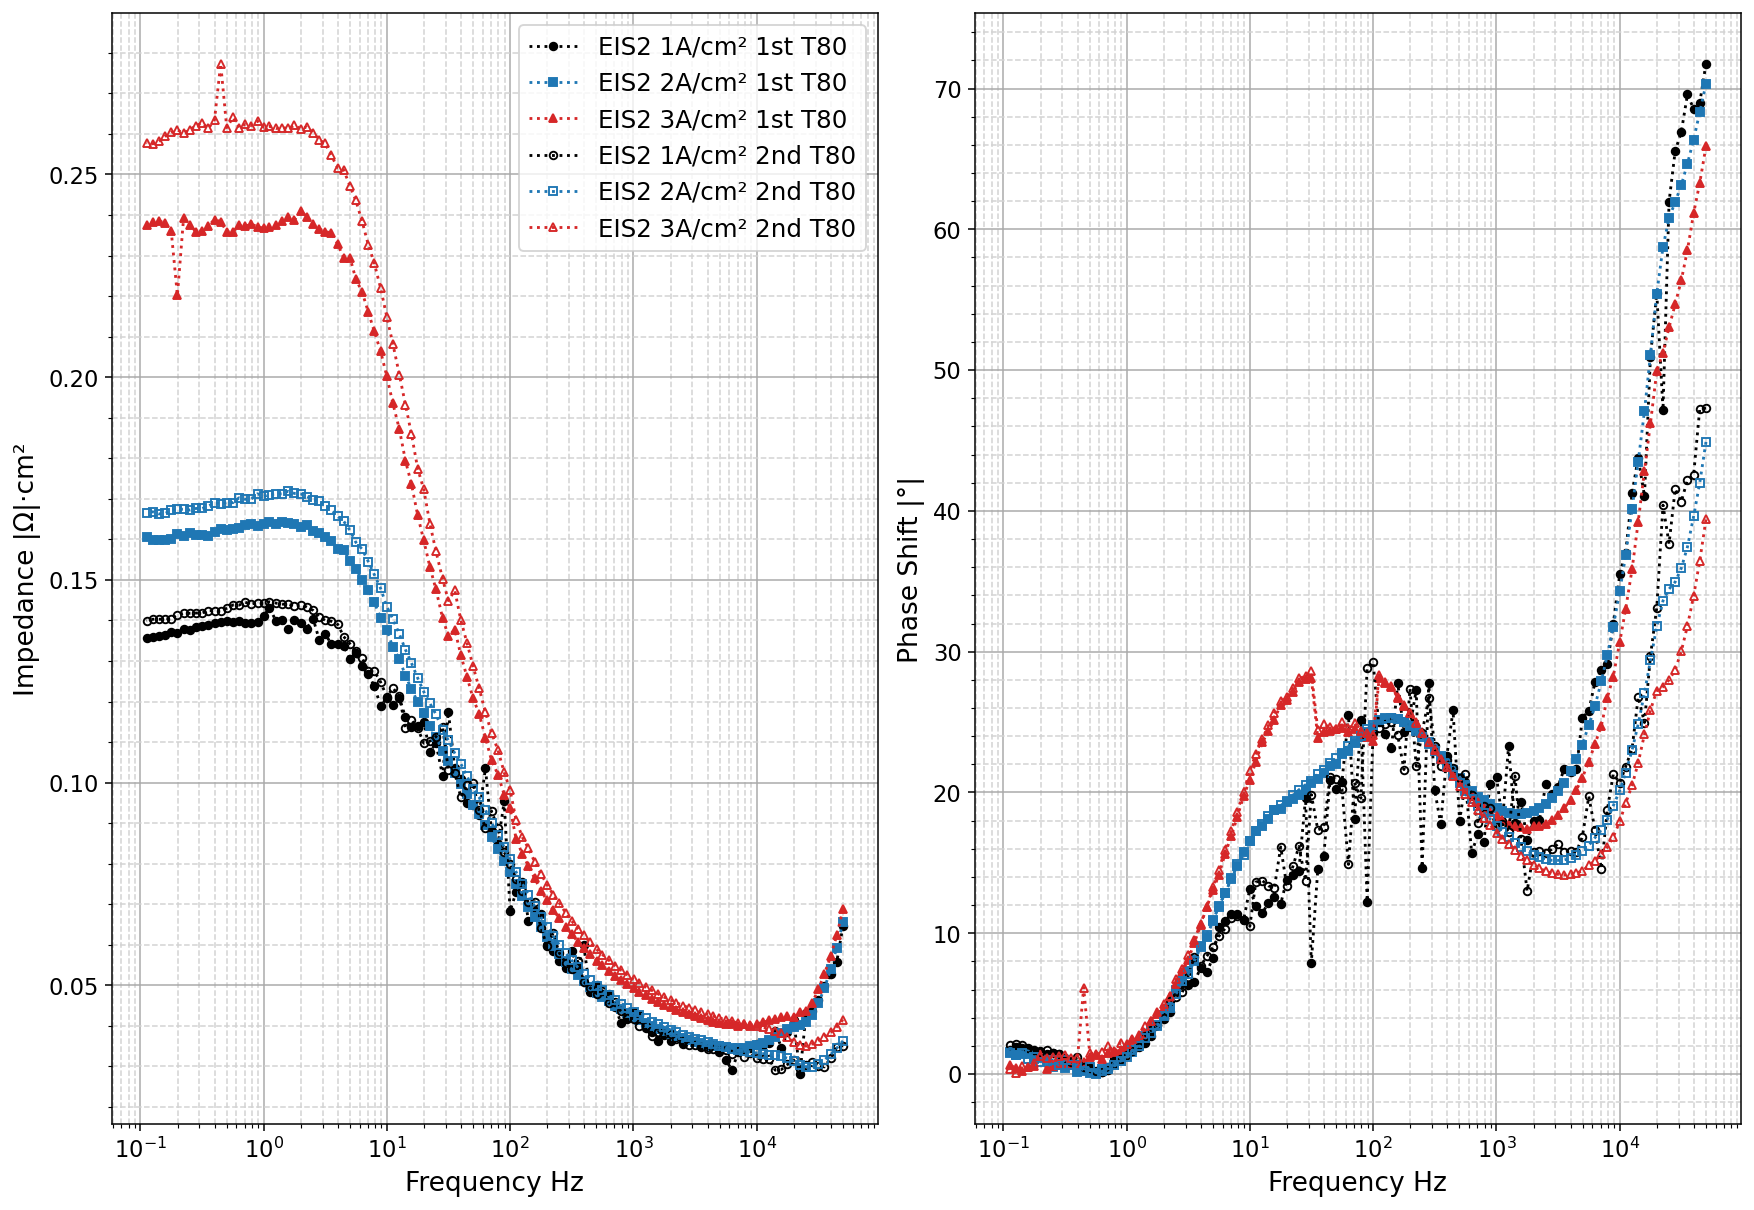

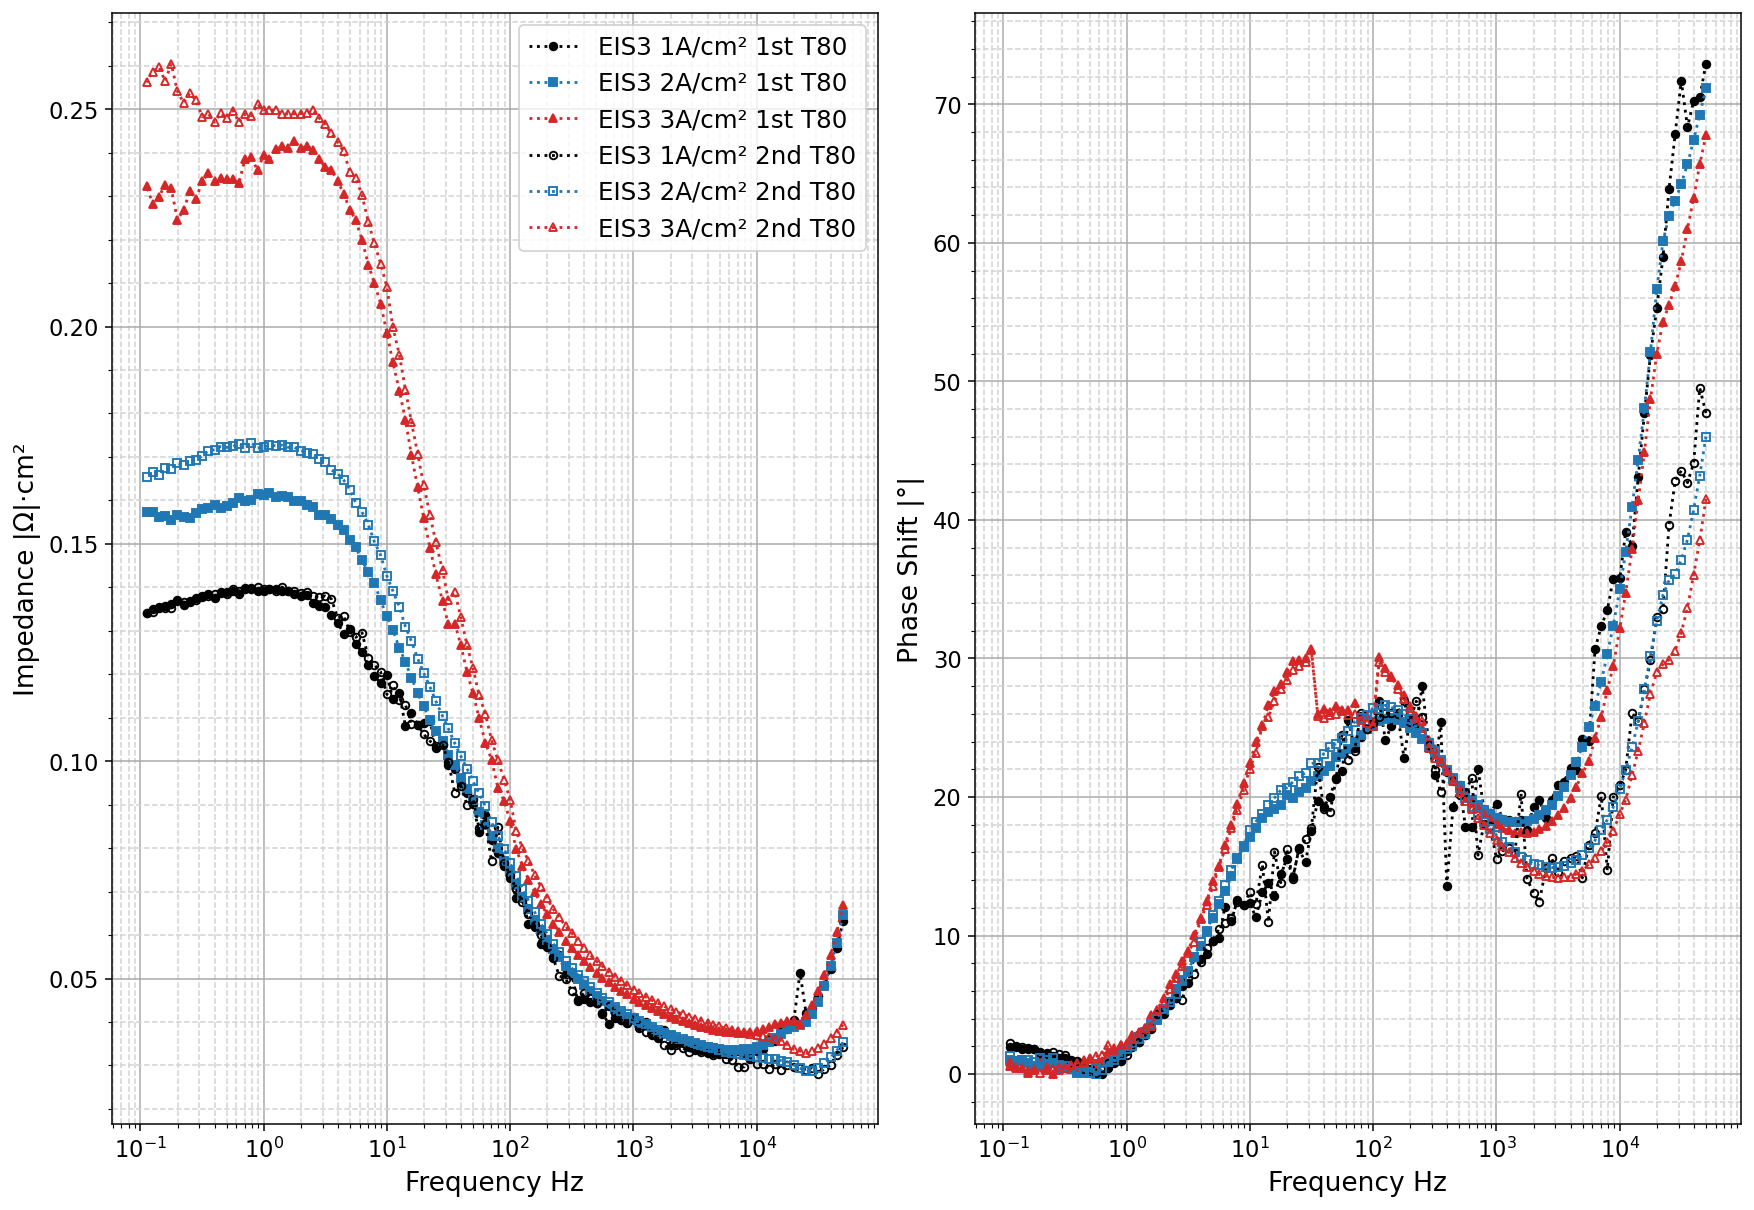

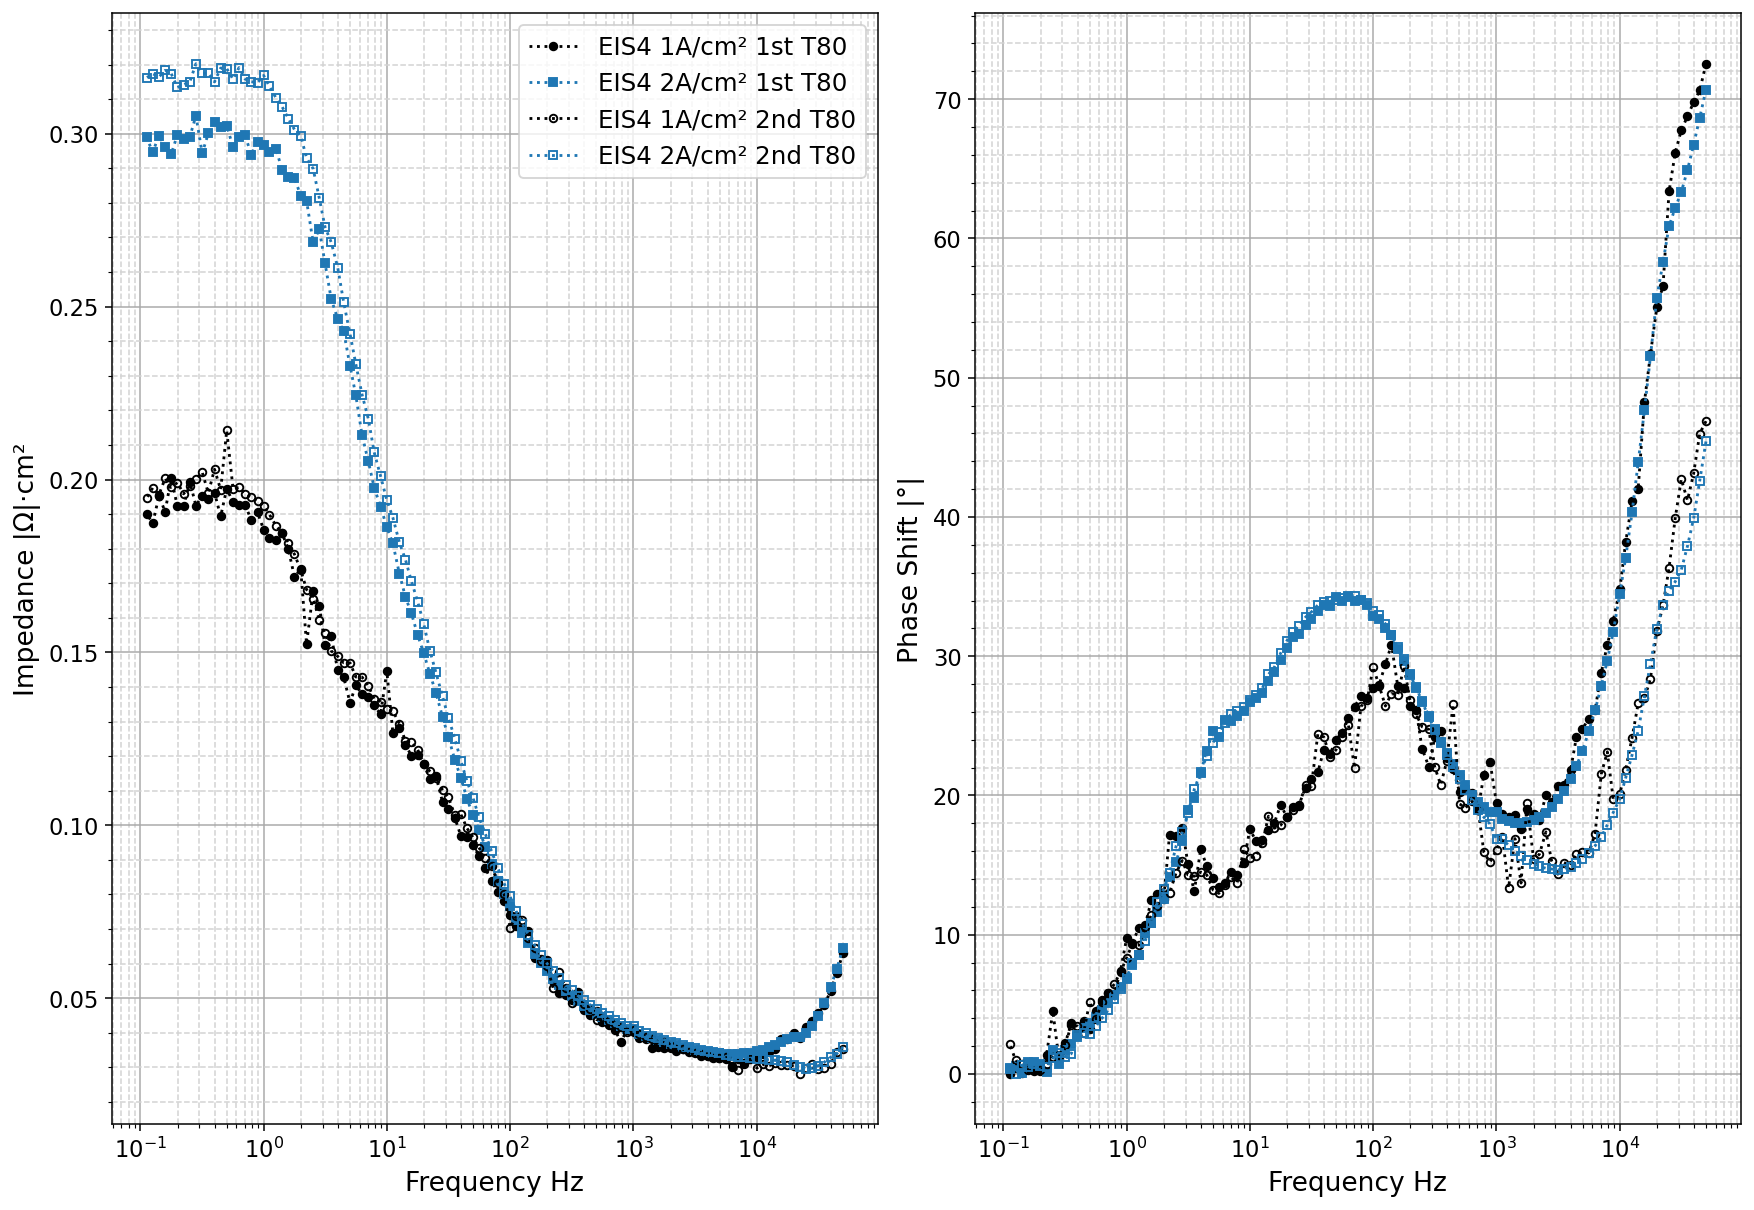

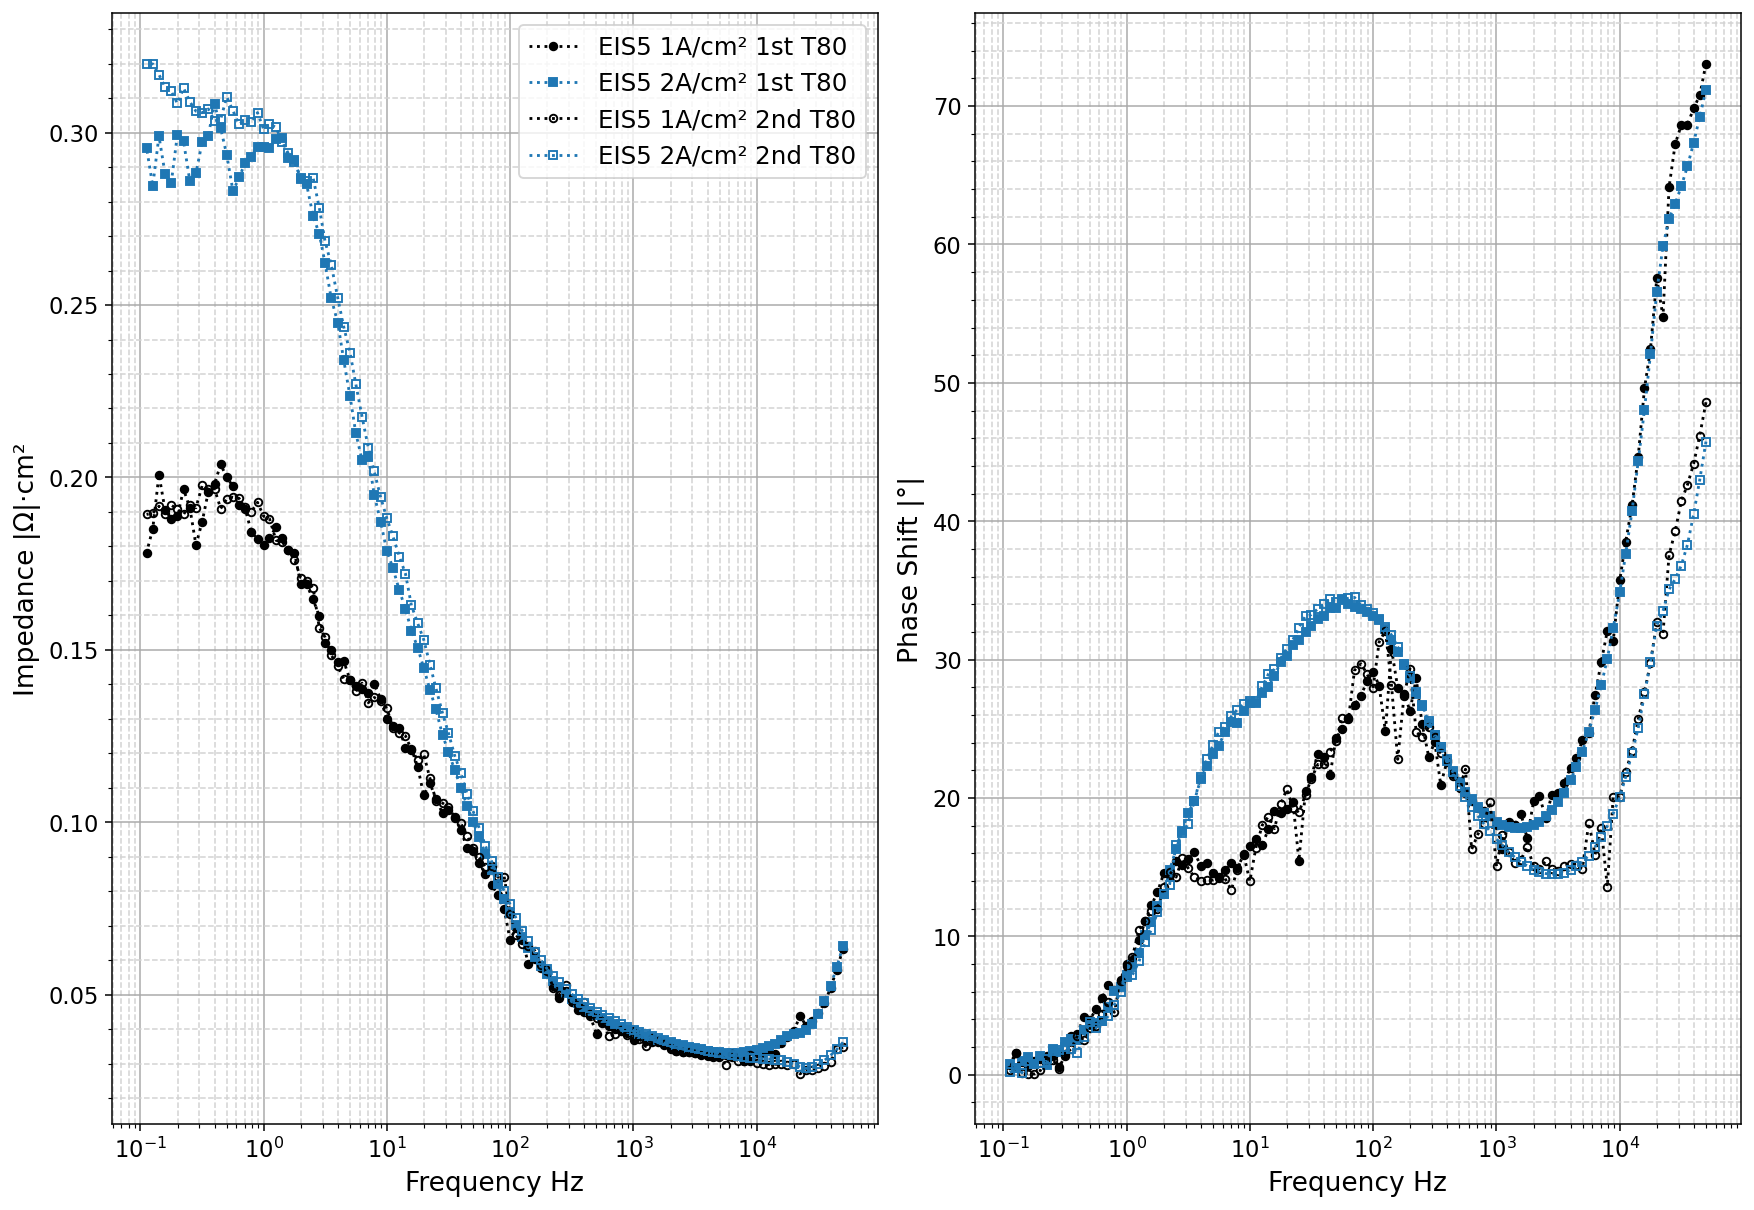

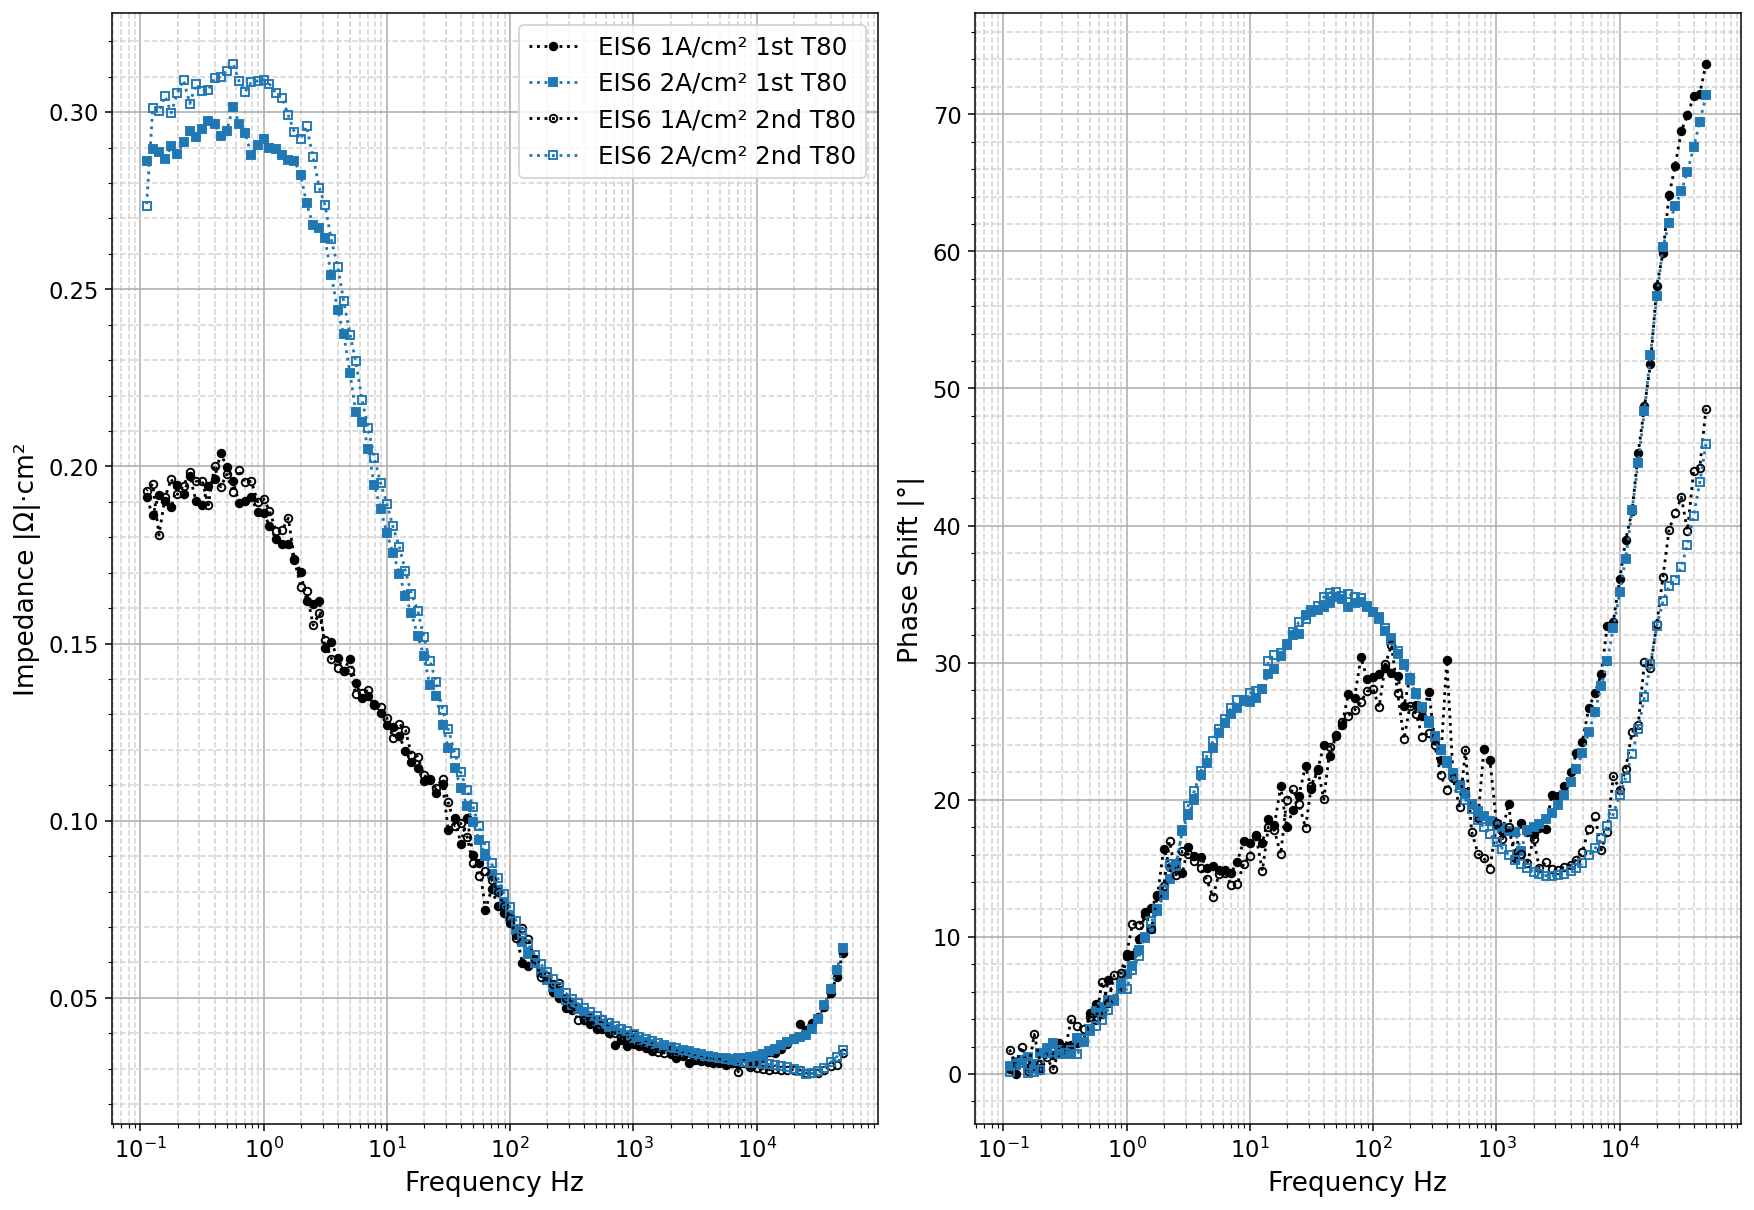

In [23]:
import matplotlib.backends.backend_pdf


marker_list = ['o', 's', 'X', 'h', '8', '*']
color_list = ['black', 'tab:blue', 'tab:red', 'black', 'tab:blue', 'tab:red',]
# marker_new = ['o', 's', 'v']

marker_new = ['o', 's', '^', 'o',  's',  '^']
fill_style = ['full', 'full', 'full', 'none', 'none', 'none']
fill_style2 = ['full', 'none']
# line_style = ['solid', 'solid', 'solid', 'solid', 'solid', 'solid'] #'solid',
# line_style = ['solid', 'solid', 'solid', 'dotted', 'dotted', 'dotted',]
line_style = ['dotted', 'dotted', 'dashed']
hum_label = ['[λC:5/50%RH]', '[λC:5/75%RH]', '[λC:5/100%RH]', '[λC:2/50%RH]',
             '[λC:2/75%RH]', '[λC:2/100%RH]']
temp = [60, 70, 80]
xrange=(0.0005, 0.045)
yrange=(0.0005, -0.018)
ranges = [[0.00075, 0.02, 0.0005, -0.006],
          #[0.00075, 0.005, 0.0005, -0.0075],
          #[0.00075, 0.0025, 0.0005, -0.003]
          ]
ranges = [[0.00075, 0.5, 0.025, -0.15],
          #[0.00075, 0.005, 0.0005, -0.0075],
          #[0.00075, 0.0025, 0.0005, -0.003]
          ]

xrange=(0.1, 50100)
yrange=(0.0005, 0.03)
y2range=(0, 90)
comp = ['1st T80', '2nd T80']

ffile = 'generated/thesis/eis_bode'

# onepdf = matplotlib.backends.backend_pdf.PdfPages\
#     (f"{ffile}/80deg.pdf")
for plot in [1, 2, 3, 4, 5, 6]:
    fig = plt.figure(figsize=(13, 9), dpi=136)
    ax1 = fig.add_subplot(121)
    ax3 = fig.add_subplot(122)
    ax1.semilogx()
    # ax2 = ax1.twinx()
    ax3.semilogx()
    # ax1.invert_yaxis()
    for num, obj in enumerate([eis_80_old,eis_80_lat]):
        # ax2 = ax1.twinx()
        for enum, (key, val) in enumerate(obj.dict_chosen_df.items()):
            ctr = 0
            if str(plot) in key:
                for k, signal in val.items():
                    # real = signal['real [ohm]']*25
                    # img = signal['imag [ohm]']*25
                    # ax1.plot(real, img, label=f'{comp[num]}°C Pol{plot} '
                    #                           f'{k[0]}A/cm²',
                    #              marker=marker_new[ctr],
                    #              color=color_list[ctr],
                    #              fillstyle=fill_style2[num],
                    #              linestyle=line_style[num],
                    #              # linestyle='dotted',
                    #              markersize=4)
                    freq = signal['freq meas [Hz]']
                    imp = signal['impedance [ohm]']*25
                    pshift = signal['phase [deg]']
                    for i, abs_v in enumerate(pshift):
                        new_v = abs_v
                        pshift[i] = abs(new_v)
                    ax1.plot(freq, imp, label=f'{key[:-2]}{key[-1:]} '
                                              f'{k[0]}A/cm² '
                                              f'{comp[num]}',
                             marker=marker_new[ctr],
                             color=color_list[ctr],
                                 fillstyle=fill_style2[num],
                                 linestyle=line_style[num],
                                 # linestyle='dotted',
                                 markersize=4)
                    ax3.plot(freq, pshift, label=f'{key}-{k[0]}A |°|',
                         marker=marker_new[ctr],
                             color=color_list[ctr],
                                 fillstyle=fill_style2[num],
                                 linestyle=line_style[num],
                                 # linestyle='dotted',
                                 markersize=4)
                    # ax1.scatter(real, img, marker='.')
                    ctr += 1

            # line, label = ax1.get_legend_handles_labels()
    ax1.legend(fontsize=13)

        # ax2.legend()
    # fig.suptitle(f'EIS Pol{plot} {hum_label[plot-1]} at 70°C')
    ax1.minorticks_on()
    ax1.tick_params(axis='both', which='major', labelsize=12)#
    ax3.minorticks_on()
    ax3.tick_params(axis='both', which='major', labelsize=12)

    ax1.grid(True, which='minor', color='lightgrey', linestyle='--')
    ax1.grid(True, which='major', color= 'darkgrey')
    ax1.set_ylabel('Impedance |Ω|·cm²', fontsize=14)
    ax1.set_xlabel('Frequency Hz', fontsize=14)

    ax3.grid(True, which='minor', color='lightgrey', linestyle='--')
    ax3.grid(True, which='major', color= 'darkgrey')
    ax3.set_ylabel('Phase Shift |°|', fontsize=14)
    ax3.set_xlabel('Frequency Hz', fontsize=14)
    # for r in ranges:
    #
    #     ax1.set_xlim(r[0], r[1])
    #     ax1.set_ylim(r[2], r[3])
    plt.tight_layout()
    #     plt.show()
    fig.savefig(f'{ffile}/80Pol{plot}-Bode.png')
        # onepdf.savefig(fig)
# onepdf.close()


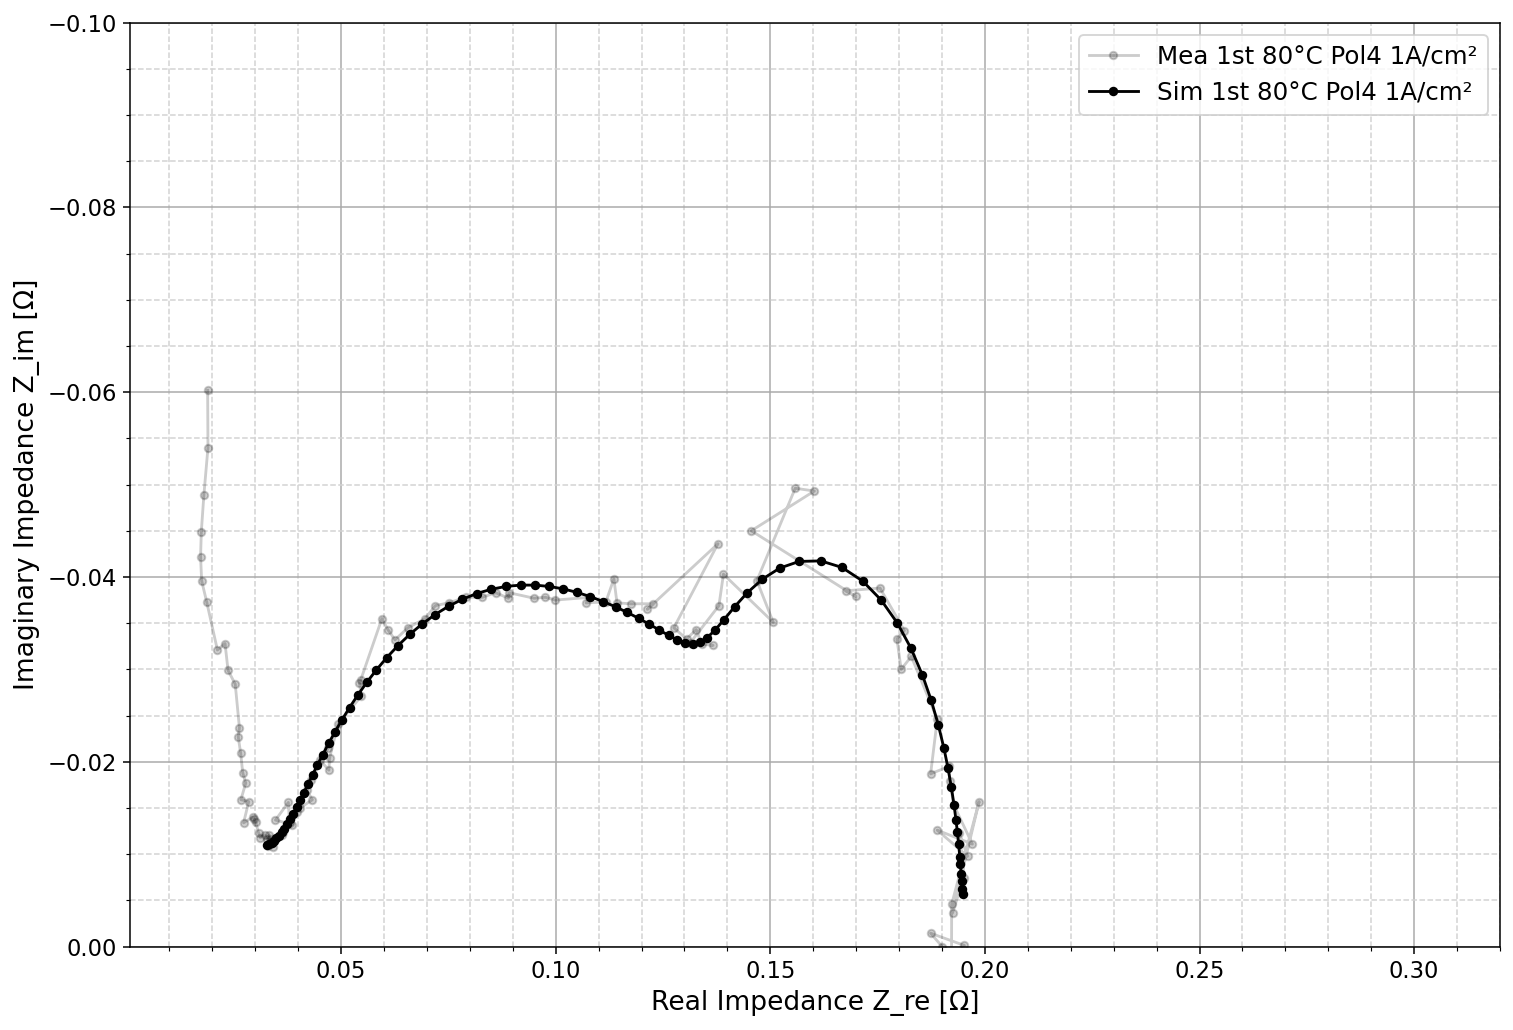

In [88]:
marker_list = ['o', 's', 'X', 'h', '8', '*']
color_list = ['black', 'tab:blue', 'tab:red', 'black', 'tab:blue', 'tab:red',]
color_list = [ 'black', 'black', 'black', 'black']
# color_list = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue']
# color_list = [ 'tab:red', 'tab:red', 'tab:red', 'tab:red']
# marker_new = ['o', 's', 'v']

# marker_new = ['o', 's', '^', 'o',  's',  '^']
marker_new = ['o', 'o', 'o', 'o']
fill_style = ['full', 'full', 'full', 'none', 'none', 'none']
fill_style2 = ['full','full','none', 'none']
# line_style = ['solid', 'solid', 'solid', 'solid', 'solid', 'solid'] #'solid',
# line_style = ['solid', 'solid', 'solid', 'dotted', 'dotted', 'dotted',]
line_style = ['solid','solid', 'dotted', 'dotted']
hum_label = ['[λC:5/50%RH]', '[λC:5/75%RH]', '[λC:5/100%RH]', '[λC:2/50%RH]',
             '[λC:2/75%RH]', '[λC:2/100%RH]']
temp = [60, 70, 80]
xrange=(0.0005, 0.045)
yrange=(0.0005, -0.018)
ranges = [[0.00075, 0.5, 0.025, -0.15]]
alphas = [0.2, 1, 0.2, 1]
labell = ['Mea 1st 80°C Pol4 1A/cm²', 'Sim 1st 80°C Pol4 1A/cm²',
          'Mea 2nd 80°C Pol4 1A/cm²', 'Sim 2nd 80°C Pol4 1A/cm²']

data1 = 'C:/Users/kamal/Thesis-ZBT/Fitting/01_EIS_4.1_25A_1,25A_EIS_22-03-26_2016_001_to_zplot(80-1).txt'
data2 = 'C:/Users/kamal/Thesis-ZBT/Fitting/Fit_01_EIS_4.1_25A_1,25A_EIS_22-03-26_2016_001_to_zplot(80-1).txt'
data3 = 'C:/Users/kamal/Thesis-ZBT/Fitting/01_EIS_3.3_75A_3,75A_EIS_22-05-22_1154_001_to_zplot (80-3).txt'
data4 = 'C:/Users/kamal/Thesis-ZBT/Fitting/Fit_01_EIS_3.3_75A_3,75A_EIS_22-05-22_1154_001_to_zplot (80-3).txt'
df = pd.read_csv(data1, encoding='ISO-8859-1', sep='\t', decimal=',',
                             skiprows=128, low_memory=False)
df2= pd.read_csv(data2, encoding='ISO-8859-1', sep='\t', decimal=',',
                             skiprows=22, low_memory=False)
df3 = pd.read_csv(data3, encoding='ISO-8859-1', sep='\t', decimal=',',
                             skiprows=128, low_memory=False)
df4= pd.read_csv(data4, encoding='ISO-8859-1', sep='\t', decimal=',',
                             skiprows=22, low_memory=False)
df = df.drop(0)
df2 = df2.drop(0)
df3 = df3.drop(0)
df4 = df4.drop(0)

fig = plt.figure(figsize=(13, 9), dpi=136)
ax1 = fig.add_subplot(111)
ax1.invert_yaxis()
for num, pl in enumerate([df, df2]):
    ax1.plot(pd.to_numeric(pl["Z'(a)"], errors='coerce'),
             pd.to_numeric(pl["Z''(b)"], errors='coerce'), label=labell[num],
             marker=marker_new[num], alpha=alphas[num],
             color=color_list[num],
             fillstyle=fill_style2[num],
             linestyle=line_style[num],
             markersize=4)
    # ax1.scatter(pl["Z'(a)"], pl["Z''(b)"], marker='.')
ax1.legend(fontsize=13)

# fig.suptitle(f'EIS Pol{plot} {hum_label[plot-1]} at 80°C')
ax1.minorticks_on()
ax1.tick_params(axis='both', which='major', labelsize=12)

ax1.set_xlim(0.00075, 0.32)
ax1.set_ylim(0, -0.10)

ax1.grid(True, which='minor', color='lightgrey', linestyle='--')
ax1.grid(True, which='major', color= 'darkgrey')
ax1.set_ylabel('Imaginary Impedance Z_im [Ω]', fontsize=14)
ax1.set_xlabel('Real Impedance Z_re [Ω]', fontsize=14)
fig.savefig(f'{ffile}/Sim80POl4-EIS2.png')
# for r in ranges:
#
#         ax1.set_xlim(r[0], r[1])
#         ax1.set_ylim(r[2], r[3])
#         plt.tight_layout()
#         plt.show()

In [49]:
pd.to_numeric(pl["Z'(a)"], errors='coerce')

1     0.039085
2     0.039519
3     0.040025
4     0.040606
5     0.041261
        ...   
80    0.236339
81    0.236319
82    0.236305
83    0.236291
84    0.236277
Name: Z'(a), Length: 84, dtype: float64

In [15]:
data_70_new.dict_chosen_df['1']['V'][-1:]

25    1.037709
Name: V, dtype: float64

In [ ]:
data_70_new.dict_chosen_df